In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_rows = None
pd.set_option('display.width', 1000)  # prevent line breaks
# Visualization style setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('pastel')
pd.options.display.max_columns = None



In [22]:
# Load datasets
employee=pd.read_csv('Employee.csv')
performance=pd.read_csv('PerformanceRating.csv')
education_level=pd.read_csv('EducationLevel.csv')
rating_level=pd.read_csv('RatingLevel.csv')
satisfaction=pd.read_csv('SatisfiedLevel.csv')
employee['HireDate'] = pd.to_datetime(employee['HireDate'], dayfirst=True)
performance['ReviewDate'] = pd.to_datetime(performance['ReviewDate'])
perf_full = performance.merge(employee, on='EmployeeID', how='left')
# satis_full = satisfaction.merge(employee, on='EmployeeID', how='left') indirect relationship 
perf_full['Month'] = perf_full['ReviewDate'].dt.to_period('M')
performance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6709 non-null   object        
 1   EmployeeID                       6709 non-null   object        
 2   ReviewDate                       6709 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6709 non-null   int64         
 4   JobSatisfaction                  6709 non-null   int64         
 5   RelationshipSatisfaction         6709 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64         
 7   TrainingOpportunitiesTaken       6709 non-null   int64         
 8   WorkLifeBalance                  6709 non-null   int64         
 9   SelfRating                       6709 non-null   int64         
 10  ManagerRating                    6709 non-null   int64      

In [5]:


def generate_data_quality_report(df, df_name):
    """Generates and prints a basic data quality report (Missing Values, Types, Unique Counts)."""
    
    print(f"\n--- Data Quality Report for: {df_name} ---")
    
    # 1. Missing Values (Null Count and Percentage)
    missing_info = pd.DataFrame({
        'Dtype': df.dtypes,
        'Missing Count': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100
    })
    
    # 2. Duplicates Check
    duplicate_count = df.duplicated().sum()
    print(f"\n[1] Total number of full row duplicates: {duplicate_count}")
    
    # 3. Missing Values Report
    missing_data = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
    
    if not missing_data.empty:
        print("\n[2] Columns with Missing Values:")
        # تم استبدال .to_markdown() بـ .to_string()
        print(missing_data[['Dtype', 'Missing Count', 'Missing %']].to_string()) 
    else:
        print("\n[2] No missing values detected in the entire DataFrame.")
    
    # 4. Basic Head
    print("\n[3] First 5 Rows Sample (Post-Cleaning):")
    # تم استبدال .to_markdown() بـ .to_string()
    print(df.head().to_string(index=False))
    
# def clean_and_validate_data():
#     """Performs data cleaning, type conversion, and integrity checks."""
    
#     print("--- Starting Data Cleaning and Validation ---")
    
#     # 1. Load Data
#     try:
#         employee = pd.read_csv('Employee.csv')
#         performance = pd.read_csv('PerformanceRating.csv')
#     except FileNotFoundError as e:
#         print(f"Error loading file: {e}")
#         return

#     # 2. Data Type Conversion and Cleaning
    
#     # A. Employee Table Cleaning
#     employee['HireDate'] = pd.to_datetime(employee['HireDate'], dayfirst=True, errors='coerce')
#     employee['Education'] = pd.to_numeric(employee['Education'], errors='coerce') # Ensure Education ID is numeric
#     employee['EmployeeID'] = employee['EmployeeID'].astype(str).str.strip() # Clean ID for merging
    
#     # B. Performance Table Cleaning
#     performance['ReviewDate'] = pd.to_datetime(performance['ReviewDate'], dayfirst=True, errors='coerce')
#     performance['EmployeeID'] = performance['EmployeeID'].astype(str).str.strip() # Clean ID for merging
    
#     # 3. Integrity Checks
    
#     # Check for duplicate Employee IDs (Should be unique in Employee table)
#     employee_id_duplicates = employee['EmployeeID'].duplicated().sum()
#     if employee_id_duplicates > 0:
#         print(f"\n[INTEGRITY ALERT] Found {employee_id_duplicates} duplicate EmployeeIDs in Employee table. Duplicates removed (keeping last record).")
#         employee = employee.drop_duplicates(subset=['EmployeeID'], keep='last')
        
#     # Check for performance rating consistency (Ratings usually 1 to 5)
#     invalid_ratings = performance[~performance['SelfRating'].isin(range(1, 6)) | ~performance['ManagerRating'].isin(range(1, 6))]
#     if not invalid_ratings.empty:
#         print(f"\n[CONSISTENCY ALERT] Found {len(invalid_ratings)} records with SelfRating or ManagerRating outside the expected 1-5 range.")
#         # Note: No automatic correction is applied here; it's an alert for manual inspection.

#     # 4. Save Cleaned DataFrames
#     employee.to_csv("employee_cleaned.csv", index=False)
#     performance.to_csv("performance_cleaned.csv", index=False)
    
#     print("\n--- Data Cleaning and Validation Finished ---")
#     print("Cleaned Data saved to: employee_cleaned.csv and performance_cleaned.csv")
    
#     # 5. Generate Final Reports
#     generate_data_quality_report(employee, "Employee")
#     generate_data_quality_report(performance, "PerformanceRating")
    
#     return employee, performance

# employee_cleaned, performance_cleaned = clean_and_validate_data()
# CODE FOR CELL 3 (OR THE CLEANING/MERGING CELL)

# Load the dataframes (assuming this part is already done)
# employee = pd.read_csv('Employee.csv')
# performance = pd.read_csv('PerformanceRating.csv')

# FIX 1: Define a robust cleaning function for employee data
def clean_employee(df):
    # Correct HireDate Conversion (D/M/Y format is assumed and applied consistently)
    # The previous error in performance was likely due to errors='coerce' on mixed formats.
    # We will try to rely on 'dayfirst=True' for consistent DD/MM/YYYY format.
    df['HireDate'] = pd.to_datetime(df['HireDate'], dayfirst=True)
    
    # Strip whitespace from object columns
    for col in df.select_dtypes(include=['object']).columns:
        if col not in ['HireDate']:
            df[col] = df[col].str.strip()
    return df

# FIX 1 & 3: Define a robust cleaning function for performance data
def clean_and_process_performance(df, mapping):
    # Correct ReviewDate Conversion (D/M/Y format is assumed)
    df['ReviewDate'] = pd.to_datetime(df['ReviewDate'], dayfirst=True)
    
    # FIX 3: Map to NEW columns (Avoid overwriting numeric ratings)
    df['EnvironmentSatisfactionDesc'] = df['EnvironmentSatisfaction'].map(mapping)
    df['JobSatisfactionDesc'] = df['JobSatisfaction'].map(mapping)
    df['RelationshipSatisfactionDesc'] = df['RelationshipSatisfaction'].map(mapping)
    
    # Strip whitespace from object columns
    for col in df.select_dtypes(include=['object']).columns:
        if col not in ['ReviewDate']:
            df[col] = df[col].str.strip()

    return df

# Load the satisfaction mapping
satisfied_level = pd.read_csv('SatisfiedLevel.csv')
satisfied_map = satisfied_level.set_index('SatisfactionID')['SatisfactionLevel'].to_dict()

# Apply cleaning to create the CLEANED dataframes
employee_cleaned = clean_employee(employee.copy())
performance_cleaned = clean_and_process_performance(performance.copy(), satisfied_map)

# FIX 2: Use CLEANED DataFrames for Merging (Ensure all cleaning is carried forward)
perf_full = performance_cleaned.merge(employee_cleaned[['EmployeeID', 'Attrition', 'HireDate', 'Department', 'JobRole', 'Gender']],
                                      on='EmployeeID',
                                      how='left')

# FIX 4: Prepare the 'ReviewMonth' column for consistent monthly analysis
perf_full['ReviewMonth'] = perf_full['ReviewDate'].dt.to_period('M')

# Check for nulls after conversion to confirm the date fix
print(f"Nulls after ReviewDate fix: {perf_full['ReviewDate'].isnull().sum()}")

Nulls after ReviewDate fix: 0


In [6]:
# satisfaction_map = {
#     1: 'Very Dissatisfied',
#     2: 'Dissatisfied',
#     3: 'Neutral',
#     4: 'Satisfied',
#     5: 'Very Satisfied'
# }
# #transform JobSatisfaction 
# performance['JobSatisfactionDesc'] = performance['JobSatisfaction'].map(satisfaction_map)

# # transform RelationshipSatisfaction
# performance['RelationshipSatisfactionDesc'] = performance['RelationshipSatisfaction'].map(satisfaction_map)
# performance['EnvironmentSatisfaction'] = performance['EnvironmentSatisfaction'].map(satisfaction_map)
# # نسبة كل مستوى رضا
# job_satis_counts = performance['JobSatisfactionDesc'].value_counts(normalize=True) * 100
# job_satis_trend = performance.groupby('ReviewDate')['JobSatisfaction'].mean().reset_index()

# print(job_satis_counts)
# print(job_satis_trend)



In [7]:
# CODE FOR CELL 4 (ANALYSIS PREPARATION CELL)

# FIX 4: Perform Monthly Trend Analysis using the merged 'perf_full' DataFrame
# Group by the 'ReviewMonth' period for consistent monthly analysis
monthly_job_satis_trend = perf_full.groupby('ReviewMonth')['JobSatisfaction'].mean().reset_index()

# Convert the 'ReviewMonth' Period object back to a timestamp for plotting ease
monthly_job_satis_trend['ReviewMonth_Start'] = monthly_job_satis_trend['ReviewMonth'].dt.to_timestamp()

print("Monthly Job Satisfaction Trend Head (Consistent Monthly Data):")
print(monthly_job_satis_trend.head())

# FIX 5: Define 'relationship_counts_df' correctly for the Pie Chart in Cell 6
# Calculate counts of the descriptive satisfaction level
relationship_counts = perf_full['RelationshipSatisfactionDesc'].value_counts()
relationship_counts_df = relationship_counts.reset_index()
relationship_counts_df.columns = ['SatisfactionLevel', 'Count']

# Calculate percentage for the pie chart
relationship_counts_df['Percentage'] = (relationship_counts_df['Count'] / relationship_counts_df['Count'].sum()) * 100

print("Relationship Satisfaction Counts Head (Ready for Plotting):")
print(relationship_counts_df.head())

Monthly Job Satisfaction Trend Head (Consistent Monthly Data):
  ReviewMonth  JobSatisfaction ReviewMonth_Start
0     2013-01             3.49        2013-01-01
1     2013-02             3.67        2013-02-01
2     2013-03             3.39        2013-03-01
3     2013-04             3.32        2013-04-01
4     2013-05             3.45        2013-05-01
Relationship Satisfaction Counts Head (Ready for Plotting):
   SatisfactionLevel  Count  Percentage
0          Satisfied   1690       25.19
1       Dissatisfied   1687       25.15
2            Neutral   1626       24.24
3     Very Satisfied   1569       23.39
4  Very Dissatisfied    137        2.04


In [8]:
# # حساب المتوسط لكل شهر (كما في الكود الأصلي)
# perf_full['Month'] = perf_full['ReviewDate'].dt.to_period('M')
# job_satis_trend = perf_full.groupby('Month')['JobSatisfaction'].mean().reset_index()

# # تحويل 'Month' إلى سلسلة نصية لسهولة الرسم
# job_satis_trend['Month_Str'] = job_satis_trend['Month'].astype(str)

# # رسم المخطط الخطي
# plt.figure(figsize=(16, 8))
# plt.plot(job_satis_trend['Month_Str'], job_satis_trend['JobSatisfaction'], marker='o', markersize=5, linestyle='-', linewidth=1)
# plt.title('Average Job Satisfaction Trend Over Time', fontsize=18)
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Average Job Satisfaction (1-5)', fontsize=14)

# #--- التعديل هنا ---
# # تحديد عدد الملصقات المراد عرضها، مثلاً كل 12 شهرًا
# N = 12 
# # تحديد مواضع النقاط التي سيتم عرض ملصقاتها
# xticks_positions = job_satis_trend.index[::N]
# # تحديد الملصقات نفسها
# xticks_labels = job_satis_trend['Month_Str'][::N]

# plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)
# # استخدام حاشية سفلية مناسبة للملصقات المائلة
# plt.subplots_adjust(bottom=0.2)
# # --------------------

# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

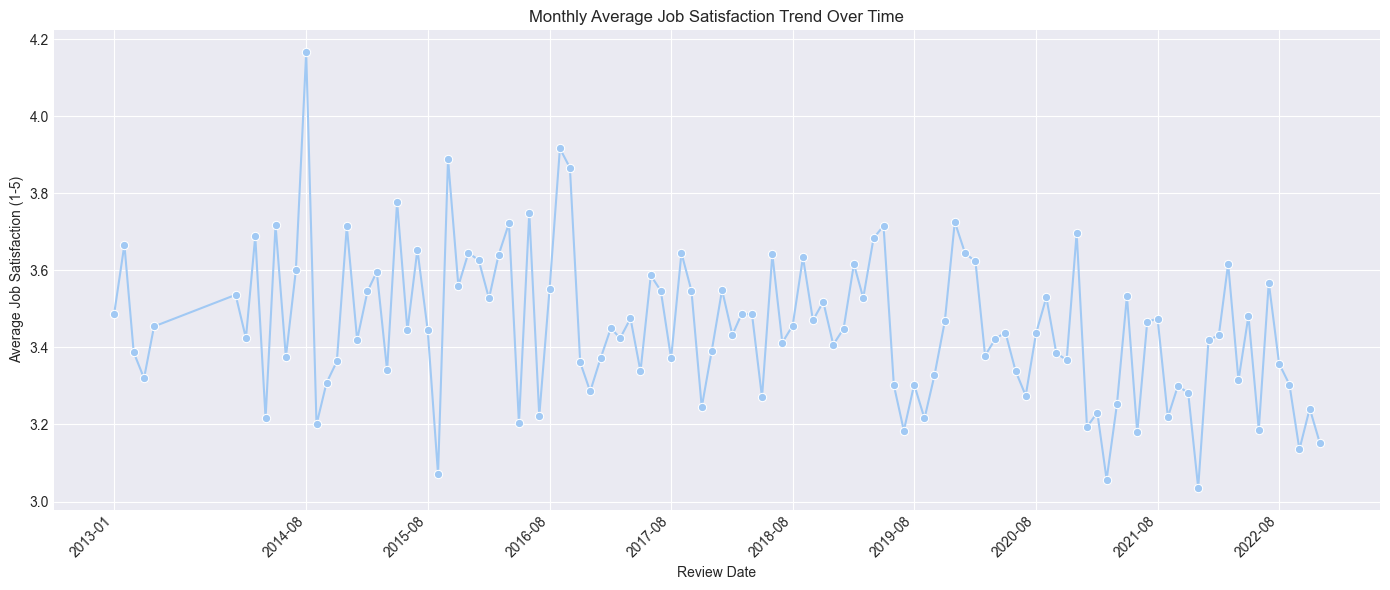

In [8]:
# CODE FOR CELL 5 (JOB SATISFACTION TREND PLOT)

# FIX 6: Use the consistent monthly trend data (monthly_job_satis_trend)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_job_satis_trend, x='ReviewMonth_Start', y='JobSatisfaction', marker='o')

plt.title('Monthly Average Job Satisfaction Trend Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Job Satisfaction (1-5)')

# FIX 6: Maintain the good practice of improving plot clarity (setting x-ticks every 12 months)
# Calculate positions and labels for x-axis ticks
xticks_positions = monthly_job_satis_trend['ReviewMonth_Start'][::12]
xticks_labels = [date.strftime('%Y-%m') for date in xticks_positions]
plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

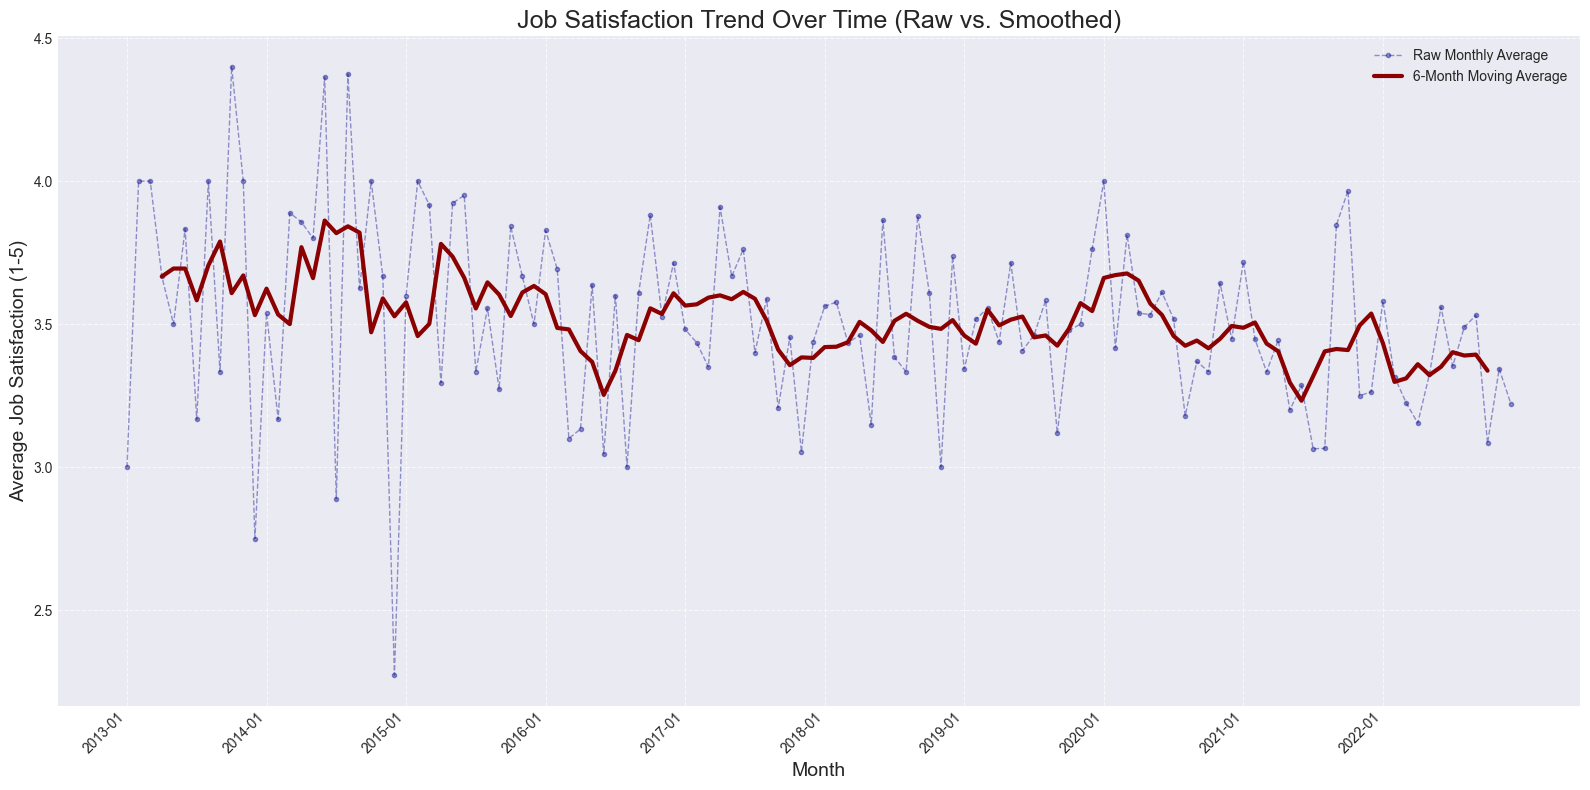

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# إعدادات الرسم
plt.style.use('seaborn-v0_8-darkgrid')

# 1. تحميل البيانات والتحويلات الأساسية
performance = pd.read_csv('PerformanceRating.csv')
performance['ReviewDate'] = pd.to_datetime(performance['ReviewDate'], dayfirst=True, errors='coerce')
performance['Month'] = performance['ReviewDate'].dt.to_period('M')

# 2. حساب الاتجاه الخام والتجميع الشهري
job_satis_trend_raw = performance.groupby('Month')['JobSatisfaction'].mean().reset_index()

# ⚠️ الخطوة المفقودة التي يجب إضافتها: تحويل العمود إلى نص للرسم
job_satis_trend_raw['Month_Str'] = job_satis_trend_raw['Month'].astype(str) 

# 3. حساب المتوسط المتحرك (6 أشهر)
job_satis_trend_raw['JobSatisfaction_MA6'] = (
    job_satis_trend_raw['JobSatisfaction']
    .rolling(window=6, center=True) 
    .mean()
)

# 4. الرسم البياني للمقارنة
plt.figure(figsize=(16, 8))

# رسم الاتجاه الخام
plt.plot(
    job_satis_trend_raw['Month_Str'], 
    job_satis_trend_raw['JobSatisfaction'], 
    marker='o', 
    markersize=3, 
    linestyle='--', 
    linewidth=1,
    alpha=0.4,
    color='darkblue',
    label='Raw Monthly Average'
)

# رسم المتوسط المتحرك
plt.plot(
    job_satis_trend_raw['Month_Str'], 
    job_satis_trend_raw['JobSatisfaction_MA6'], 
    marker='', 
    linestyle='-', 
    linewidth=3, 
    color='darkred',
    label='6-Month Moving Average'
)

# إعدادات العرض النهائية
plt.title('Job Satisfaction Trend Over Time (Raw vs. Smoothed)', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Job Satisfaction (1-5)', fontsize=14)

# التحكم في ملصقات المحور X
N = 12 
xticks_positions = job_satis_trend_raw.index[::N]
xticks_labels = job_satis_trend_raw['Month_Str'][::N]
plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.2) 

plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Job Satisfaction Summary:
Very Dissatisfied: 1.9%
Dissatisfied: 25.0%
Neutral: 24.6%
Satisfied: 25.1%
Very Satisfied: 23.4%


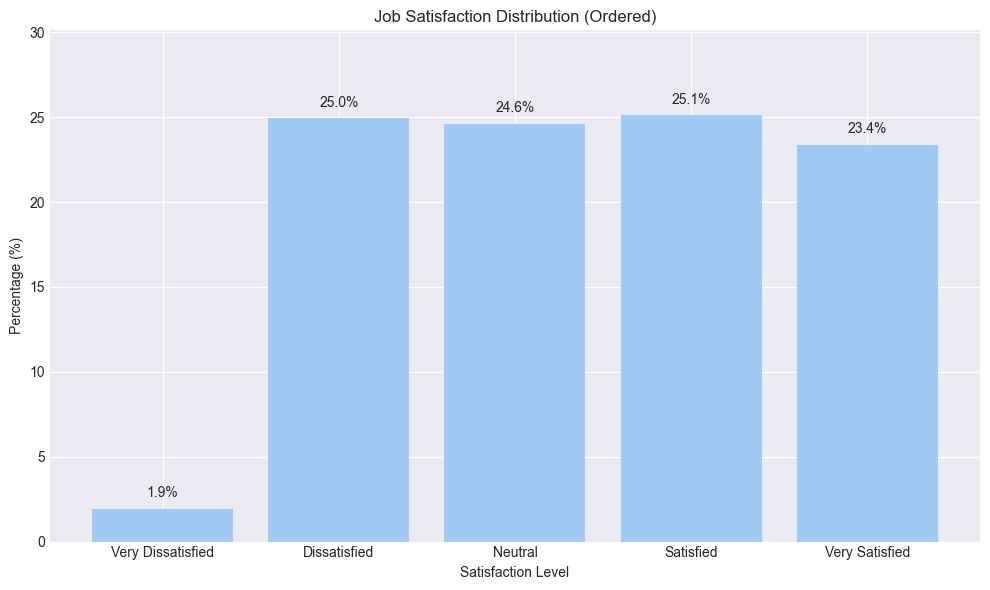

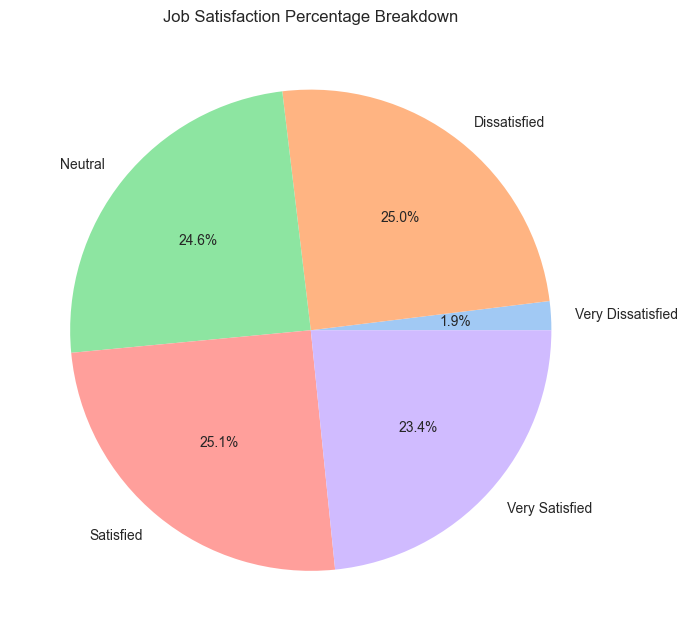

In [10]:
# FIX: Calculate job_satis_counts (percentage distribution)
# The analysis relies on the 'JobSatisfactionDesc' column created during cleaning (Cell 3).
job_satis_counts = perf_full['JobSatisfactionDesc'].value_counts(normalize=True) * 100

# -------------------------------------------------------
# 1) Define the correct satisfaction order (low → high)
# -------------------------------------------------------
order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'] 

# -------------------------------------------------------
# 2) Prepare the dataframe
# -------------------------------------------------------
job_satis_counts_df = job_satis_counts.reset_index()
job_satis_counts_df.columns = ['SatisfactionLevel', 'Percentage']

# Convert the SatisfactionLevel column into an ordered category and strip whitespace
job_satis_counts_df['SatisfactionLevel'] = pd.Categorical(
    job_satis_counts_df['SatisfactionLevel'].str.strip(),
    categories=[s.strip() for s in order],
    ordered=True
)

# Sort the dataframe based on the ordered category
job_satis_counts_df = job_satis_counts_df.sort_values('SatisfactionLevel')

# -------------------------------------------------------
# 3) Simple printed summary (text output)
# -------------------------------------------------------
print("\nJob Satisfaction Summary:")
for _, row in job_satis_counts_df.iterrows():
    print(f"{row['SatisfactionLevel']}: {row['Percentage']:.1f}%")

# -------------------------------------------------------
# 4) Bar Chart
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

bars = plt.bar(
    job_satis_counts_df['SatisfactionLevel'],
    job_satis_counts_df['Percentage']
)

# Add labels above each bar
for bar, pct in zip(bars, job_satis_counts_df['Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{pct:.1f}%",
        ha='center',
        va='bottom'
    )

plt.title("Job Satisfaction Distribution (Ordered)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Percentage (%)")
plt.ylim(0, job_satis_counts_df['Percentage'].max() + 5)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 5) Pie Chart
# -------------------------------------------------------
plt.figure(figsize=(7, 7))
plt.pie(
    job_satis_counts_df['Percentage'],
    labels=job_satis_counts_df['SatisfactionLevel'],
    autopct='%1.1f%%'
)

plt.title("Job Satisfaction Percentage Breakdown")
plt.tight_layout()
plt.show()

In [ ]:
# The job satisfaction data shows a balanced but not highly positive situation.
# Only 1.9% of employees are very dissatisfied, which is good, but 25% are dissatisfied, meaning about a quarter of the workforce is not happy.

# Around 24.6% are neutral, which means many employees are neither happy nor unhappy — they can easily move in either direction depending on company actions.

# On the positive side, about 48% of employees (Satisfied + Very Satisfied) are happy with their jobs, but this number is not very strong because satisfaction levels are almost evenly spread between Neutral, Dissatisfied, and Satisfied.

# Overall, the results suggest that:

# The company does not have a severe satisfaction crisis.

# But there is significant room for improvement because many employees are either neutral or dissatisfied.

# Small improvements in work environment, communication, rewards, or career growth can quickly increase satisfaction.
# The relationship satisfaction results show that most employees are not extremely unhappy because the percentage of very dissatisfied employees is very low. 
# About a quarter of the employees are dissatisfied, which indicates some issues in communication or teamwork that need improvement.
# A large part of the employees are neutral, meaning they do not feel strongly positive or negative about their work relationships,
# and this group is important because they can easily become satisfied or dissatisfied depending on the work environment.
# Almost half of the employees are satisfied or very satisfied, which is a good sign, but the overall distribution shows that the company still has room for improvement.
# These results are related to the previous job satisfaction results,
# as employees with better work relationships tend to feel more satisfied with their jobs, and improving team or manager relationships can increase overall employee satisfaction.



##


Relationship Satisfaction Summary:
Very Dissatisfied: 2.0%
Dissatisfied: 25.1%
Neutral: 24.2%
Satisfied: 25.2%
Very Satisfied: 23.4%


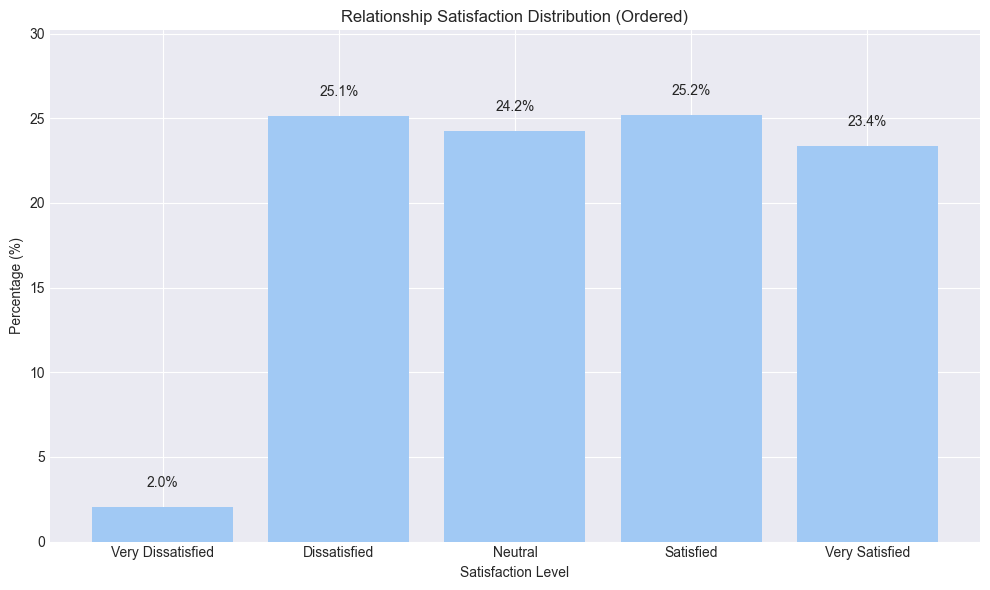

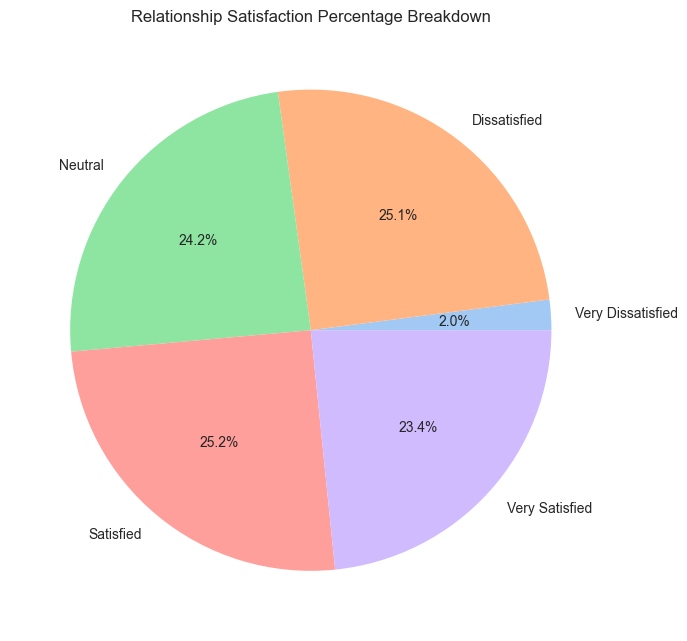

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1) Map numeric satisfaction levels (1–5) to descriptive labels
# -------------------------------------------------------
satisfaction_map = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

# Create a new descriptive column
perf_full['RelationshipSatisfactionDesc'] = perf_full['RelationshipSatisfaction'].map(satisfaction_map)

# -------------------------------------------------------
# 2) Calculate percentage distribution
# -------------------------------------------------------
relationship_counts = (
    perf_full['RelationshipSatisfactionDesc']
    .value_counts(normalize=True) * 100
)

relationship_counts_df = relationship_counts.reset_index()
relationship_counts_df.columns = ['SatisfactionLevel', 'Percentage']

# -------------------------------------------------------
# 3) Order the satisfaction levels (low → high)
# -------------------------------------------------------
order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

relationship_counts_df['SatisfactionLevel'] = pd.Categorical(
    relationship_counts_df['SatisfactionLevel'],
    categories=order,
    ordered=True
)

relationship_counts_df = relationship_counts_df.sort_values('SatisfactionLevel')

# -------------------------------------------------------
# 4) Print simple summary of results
# -------------------------------------------------------
print("\nRelationship Satisfaction Summary:")
for _, row in relationship_counts_df.iterrows():
    print(f"{row['SatisfactionLevel']}: {row['Percentage']:.1f}%")

# -------------------------------------------------------
# 5) Bar Chart using matplotlib only
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

bars = plt.bar(
    relationship_counts_df['SatisfactionLevel'],
    relationship_counts_df['Percentage']
)

# Add percentage labels above bars
for bar, pct in zip(bars, relationship_counts_df['Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{pct:.1f}%",
        ha='center',
        va='bottom'
    )

plt.title("Relationship Satisfaction Distribution (Ordered)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Percentage (%)")
plt.ylim(0, relationship_counts_df['Percentage'].max() + 5)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 6) Pie Chart showing percentage breakdown
# -------------------------------------------------------
plt.figure(figsize=(7, 7))
plt.pie(
    relationship_counts_df['Percentage'],
    labels=relationship_counts_df['SatisfactionLevel'],
    autopct='%1.1f%%'
)

plt.title("Relationship Satisfaction Percentage Breakdown")
plt.tight_layout()
plt.show()


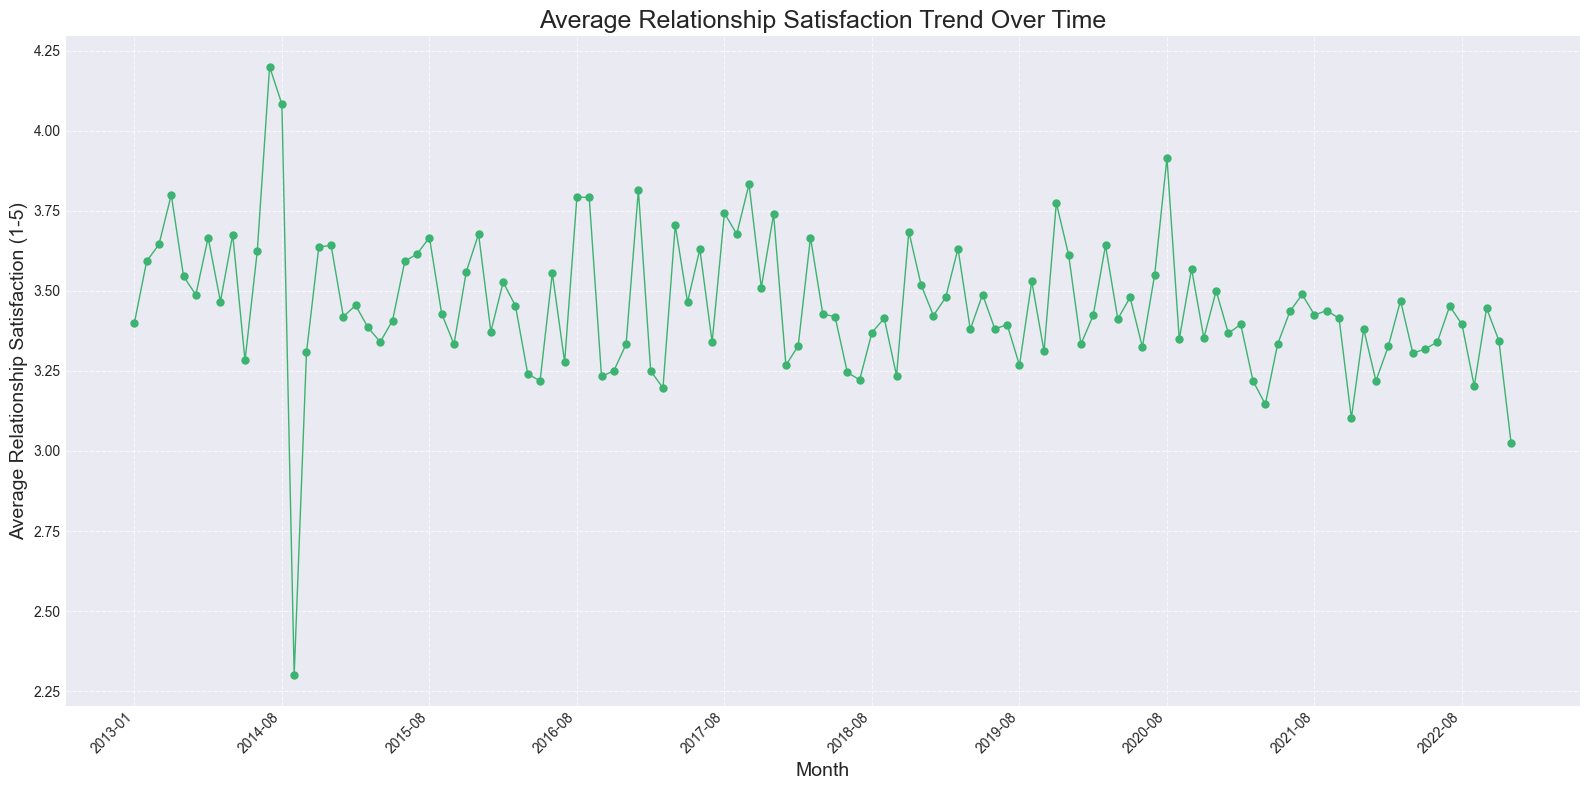

In [12]:
# FIX 2: Group by 'ReviewMonth' instead of the incorrect 'Month'
relationship_trend = perf_full.groupby('ReviewMonth')['RelationshipSatisfaction'].mean().reset_index()

# FIX 3: Convert 'ReviewMonth' (Period) to string for plotting
relationship_trend['Month_Str'] = relationship_trend['ReviewMonth'].astype(str)

# Line Chart
plt.figure(figsize=(16, 8))
plt.plot(
    relationship_trend.index, # Use index for plotting positions
    relationship_trend['RelationshipSatisfaction'],
    marker='o',
    markersize=5,
    linestyle='-',
    linewidth=1,
    color='mediumseagreen'
)
plt.title('Average Relationship Satisfaction Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Relationship Satisfaction (1-5)', fontsize=14)

# Setting x-ticks every 12 months for clarity
N = 12
xticks_positions = relationship_trend.index[::N]
xticks_labels = relationship_trend['Month_Str'][::N]

plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

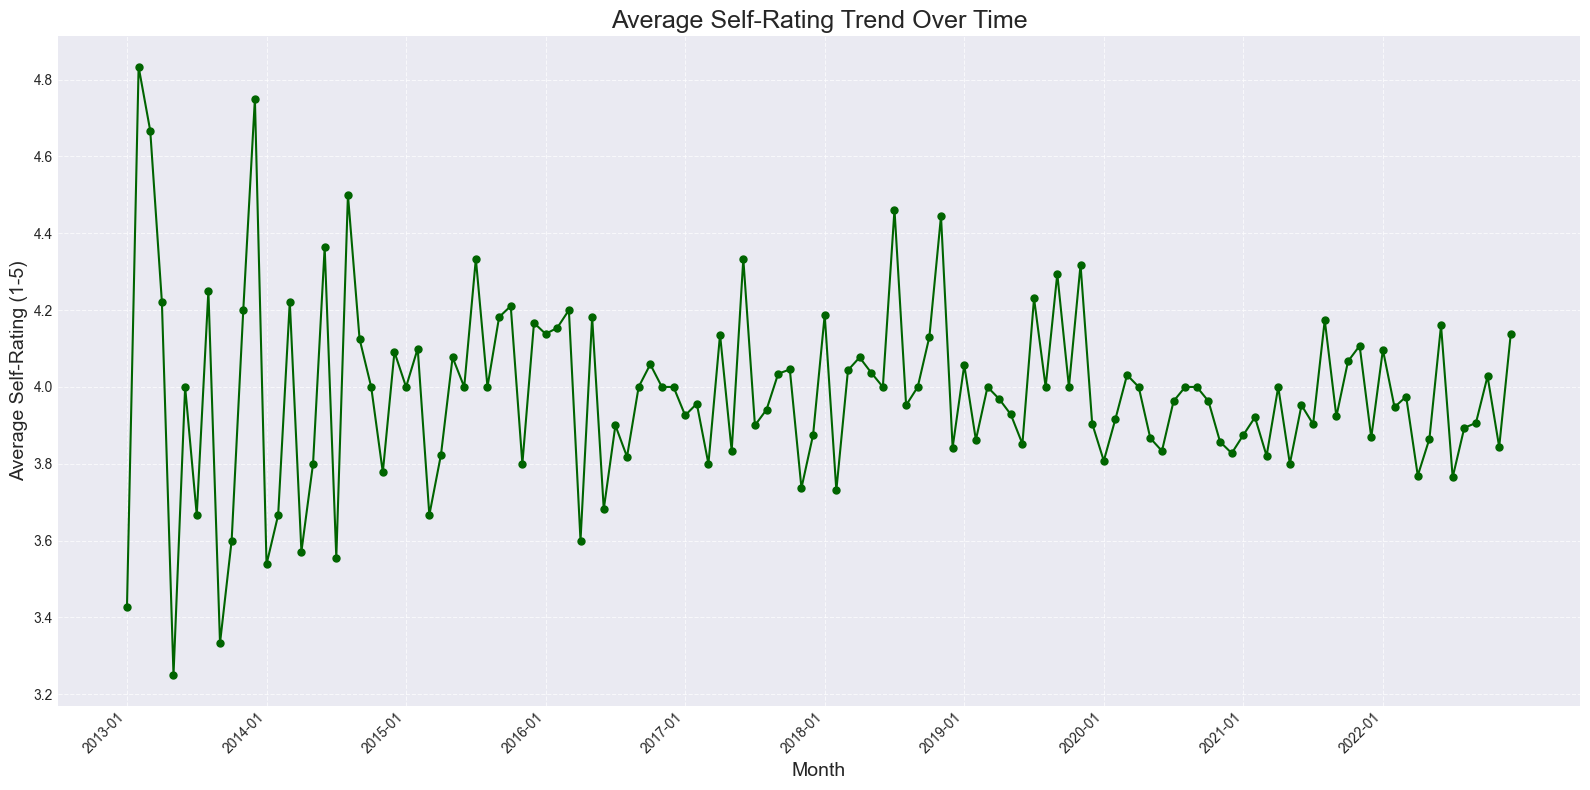

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style setup (Dark grid for professional appearance)
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Load Data and Prepare the Merged DataFrame (Essential for context)
performance = pd.read_csv('PerformanceRating.csv')

# Data Cleaning and Preparation
performance['ReviewDate'] = pd.to_datetime(performance['ReviewDate'], dayfirst=True, errors='coerce')
performance['Month'] = performance['ReviewDate'].dt.to_period('M') # Convert date to monthly period

# 2. Calculate Raw Monthly Trend
# Group by month and calculate the mean SelfRating
self_rating_trend = performance.groupby('Month')['SelfRating'].mean().reset_index()

# Convert the Period ('Month') column to string for plotting on the x-axis
self_rating_trend['Month_Str'] = self_rating_trend['Month'].astype(str) 

# ----------------------------------------------------
# 3. Plotting the Self-Rating Trend
# ----------------------------------------------------
plt.figure(figsize=(16, 8))

# Plot the time series line
plt.plot(
    self_rating_trend['Month_Str'],
    self_rating_trend['SelfRating'],
    marker='o',
    markersize=5,
    linestyle='-',
    linewidth=1.5,
    color='darkgreen' # Using a prominent color for Self-Rating
)

# Set titles and labels
plt.title('Average Self-Rating Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Self-Rating (1-5)', fontsize=14)

# --- X-Axis Label Control ---
# Define interval (N=12 for annual labels)
N = 12

# Determine positions for the labels
xticks_positions = self_rating_trend.index[::N]

# Select the corresponding labels (YYYY-MM format)
xticks_labels = self_rating_trend['Month_Str'][::N]

plt.xticks(
    xticks_positions,      # Positions on the X-axis
    xticks_labels,         # Text labels
    rotation=45,           # Tilt for readability
    ha='right',            # Alignment
    fontsize=10
)
# ----------------------------

# Adjust bottom margin to accommodate tilted labels
plt.subplots_adjust(bottom=0.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Self Rating Performance Distribution (%):
Meets Expectations: 34.1%
Exceeds Expectations: 33.3%
Above and Beyond: 32.5%


C:\Users\sayds\AppData\Local\Temp\ipykernel_22408\2923746131.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


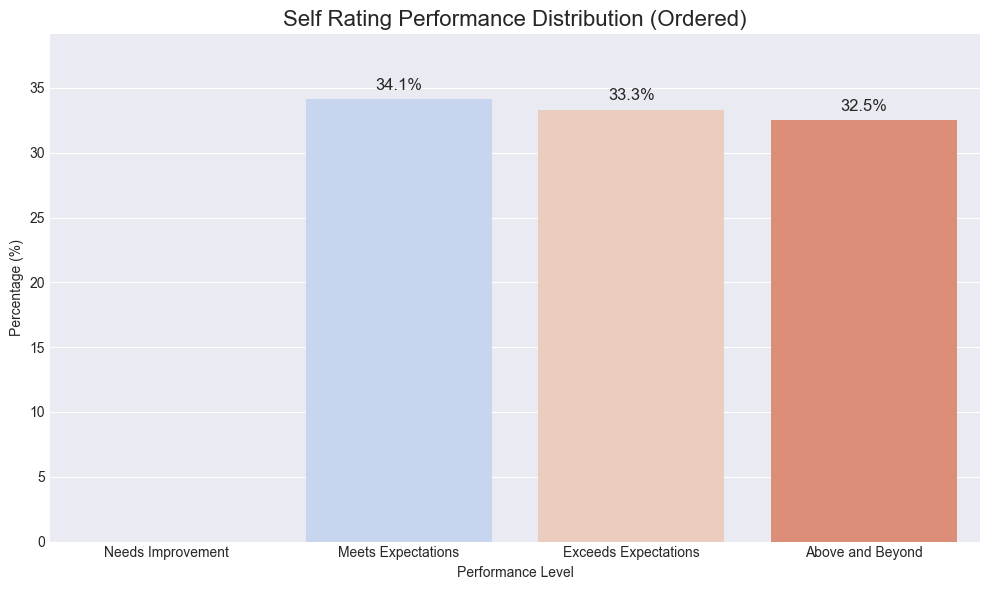

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------------------
# 1. Map numeric self ratings to descriptive categories
# ----------------------------------------------------------------------
self_map = {
    1: 'Unacceptable',
    2: 'Needs Improvement',
    3: 'Meets Expectations',
    4: 'Exceeds Expectations',
    5: 'Above and Beyond'
}

perf_full['SelfRatingDesc'] = perf_full['SelfRating'].map(self_map)

# ----------------------------------------------------------------------
# 2. Calculate the percentage of each performance level
# ----------------------------------------------------------------------
self_counts = perf_full['SelfRatingDesc'].value_counts(normalize=True) * 100
self_counts_df = self_counts.reset_index()
self_counts_df.columns = ['PerformanceLevel', 'Percentage']

# ----------------------------------------------------------------------
# 3. Order the performance levels logically
# ----------------------------------------------------------------------
order = ['Needs Improvement', 'Meets Expectations', 'Exceeds Expectations', 'Above and Beyond']
self_counts_df['PerformanceLevel'] = pd.Categorical(
    self_counts_df['PerformanceLevel'],
    categories=order,
    ordered=True
)
self_counts_df = self_counts_df.sort_values('PerformanceLevel')

# ----------------------------------------------------------------------
# 4. Print the percentages clearly
# ----------------------------------------------------------------------
print("Self Rating Performance Distribution (%):")
for i, row in self_counts_df.iterrows():
    print(f"{row['PerformanceLevel']}: {row['Percentage']:.1f}%")

# ----------------------------------------------------------------------
# 5. Plot a bar chart of the distribution
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='PerformanceLevel',
    y='Percentage',
    data=self_counts_df,
    palette=sns.color_palette("coolwarm", len(order))
)

plt.title('Self Rating Performance Distribution (Ordered)', fontsize=16)
plt.xlabel('Performance Level')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12)

plt.ylim(0, self_counts_df['Percentage'].max() + 5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Manager Rating Performance Distribution (%):
Needs Improvement: 17.8%
Meets Expectations: 33.1%
Exceeds Expectations: 33.1%
Above and Beyond: 16.0%


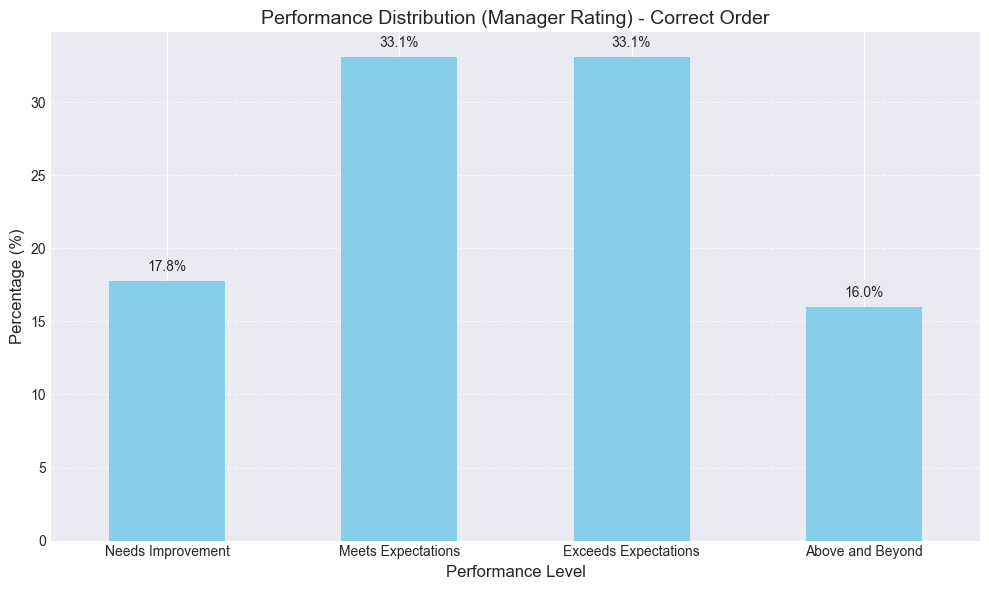

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1. Map numeric manager ratings to descriptive categories
# ----------------------------------------------------------------------
rating_map = {
    1: 'Unacceptable',
    2: 'Needs Improvement',
    3: 'Meets Expectations',
    4: 'Exceeds Expectations',
    5: 'Above and Beyond'
}

perf_full['ManagerRatingDesc'] = perf_full['ManagerRating'].map(rating_map)

# ----------------------------------------------------------------------
# 2. Calculate percentage distribution of each performance level
# ----------------------------------------------------------------------
perf_manager_distribution = perf_full['ManagerRatingDesc'].value_counts(normalize=True) * 100

# ----------------------------------------------------------------------
# 3. Define logical order for categories (lowest to highest rating)
# Note: 'Unacceptable' may be absent in data, so it's excluded
# ----------------------------------------------------------------------
order = ['Needs Improvement', 'Meets Expectations', 'Exceeds Expectations', 'Above and Beyond']

# Convert index to categorical to enforce order
perf_manager_distribution.index = pd.Categorical(
    perf_manager_distribution.index,
    categories=order,
    ordered=True
)

# Sort based on the defined order
perf_manager_distribution = perf_manager_distribution.sort_index()

# ----------------------------------------------------------------------
# 4. Print the percentages clearly
# ----------------------------------------------------------------------
print("Manager Rating Performance Distribution (%):")
for level, pct in perf_manager_distribution.items():
    print(f"{level}: {pct:.1f}%")

# ----------------------------------------------------------------------
# 5. Plot the bar chart
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 6))
ax = perf_manager_distribution.plot(kind='bar', color='skyblue')

plt.title('Performance Distribution (Manager Rating) - Correct Order', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Performance Level', fontsize=12)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


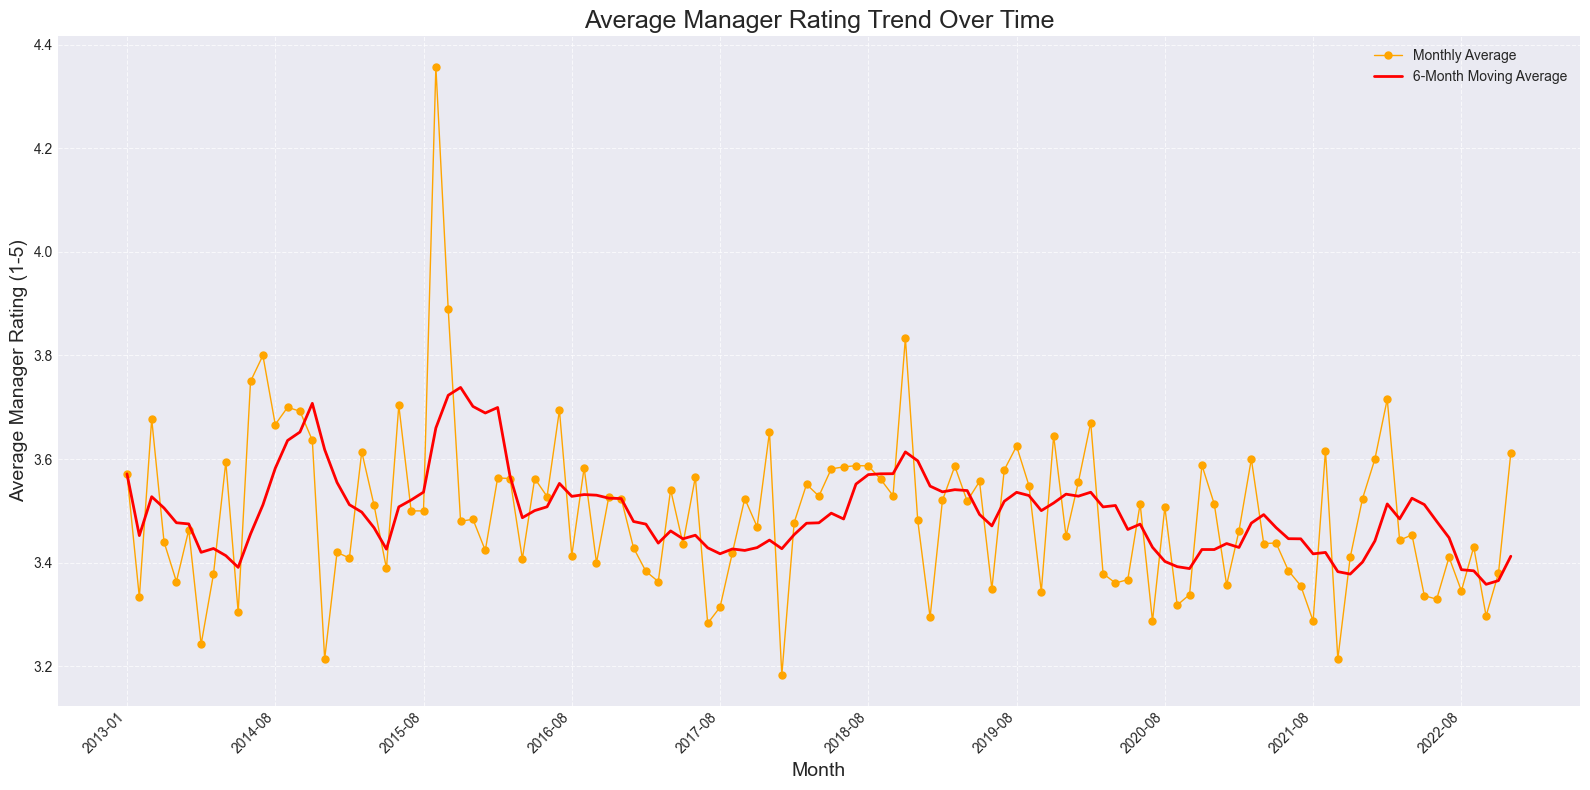

In [17]:
# ----------------------------------------------------------------------
# 1. Calculate the monthly average of Manager Rating
# ----------------------------------------------------------------------
# FIX: Use 'ReviewMonth' instead of the incorrect 'Month'
manager_rating_trend = perf_full.groupby('ReviewMonth')['ManagerRating'].mean().reset_index() 
# FIX: Use 'ReviewMonth' for string conversion
manager_rating_trend['Month_Str'] = manager_rating_trend['ReviewMonth'].astype(str) 

# ----------------------------------------------------------------------
# 2. Calculate 6-month moving average
# ----------------------------------------------------------------------
manager_rating_trend['MA6'] = manager_rating_trend['ManagerRating'].rolling(window=6, min_periods=1).mean()

# ----------------------------------------------------------------------
# 3. Plot the trend
# ----------------------------------------------------------------------
plt.figure(figsize=(16, 8))

# Original monthly average
plt.plot(
    manager_rating_trend.index, # Use index for plotting positions
    manager_rating_trend['ManagerRating'],
    marker='o',
    markersize=5,
    linestyle='-',
    linewidth=1,
    color='orange',
    label='Monthly Average'
)

# 6-Month Moving Average
plt.plot(
    manager_rating_trend.index, # Use index for plotting positions
    manager_rating_trend['MA6'],
    color='red',
    linewidth=2,
    linestyle='-',
    label='6-Month Moving Average'
)

plt.title('Average Manager Rating Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Manager Rating (1-5)', fontsize=14)

# Show every 12 months to avoid label clutter
N = 12
xticks_positions = manager_rating_trend.index[::N]
xticks_labels = manager_rating_trend['Month_Str'][::N]
plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

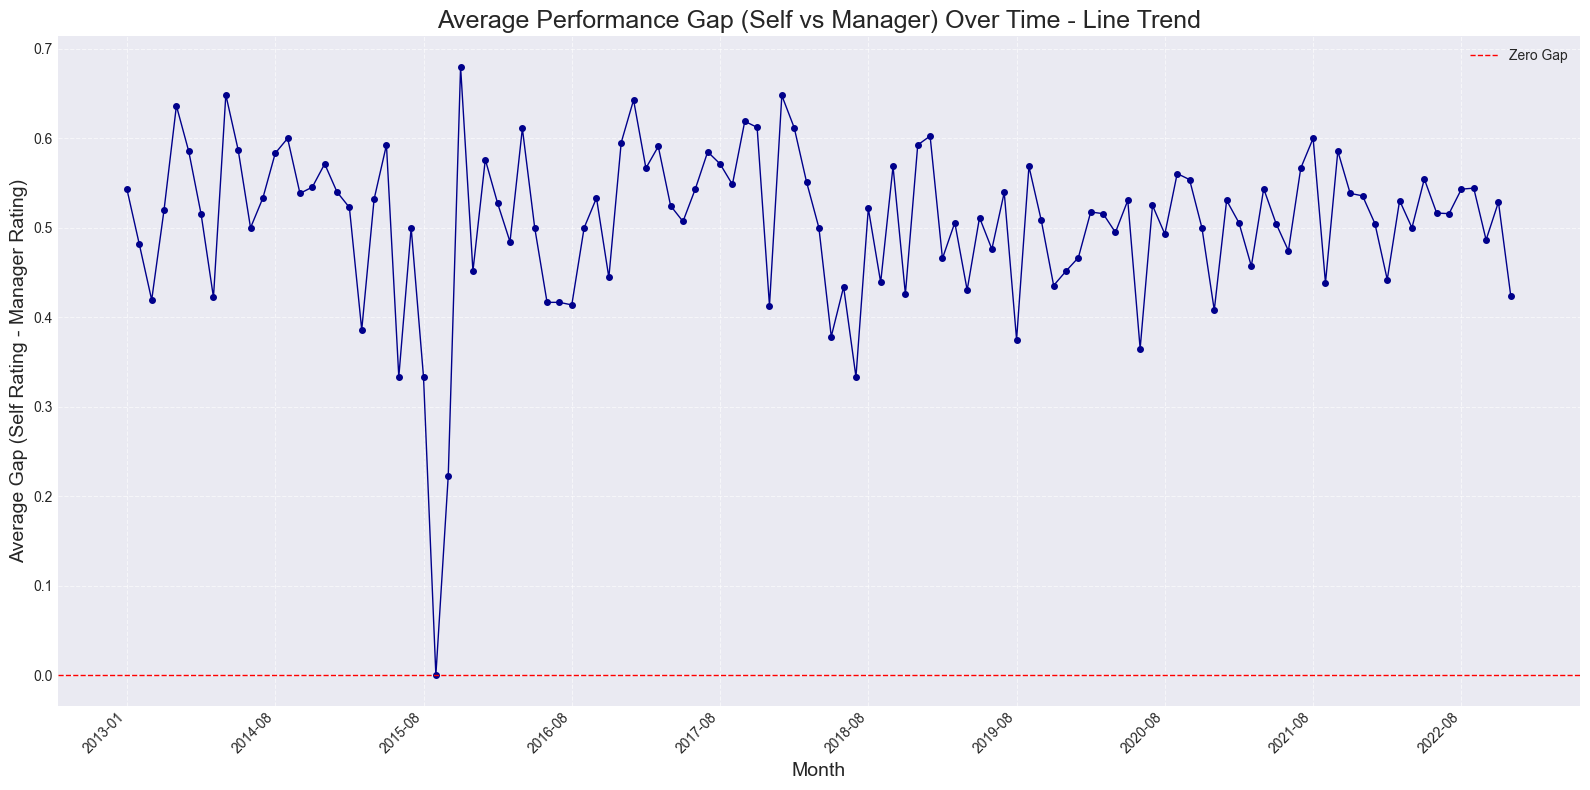

In [19]:
# حساب الفجوة (Gap) كما في الكود الأصلي
perf_full['Gap'] = perf_full['SelfRating'] - perf_full['ManagerRating']

# حساب متوسط الفجوة لكل شهر (هذا المتغير جاهز للاستخدام)
# FIX 1: Use 'ReviewMonth' instead of 'Month'
gap_trend = perf_full.groupby('ReviewMonth')['Gap'].mean().reset_index()

# ---- الرسم باستخدام المخطط الخطي (Line Plot) ----
plt.figure(figsize=(16, 8))

# FIX 2: Use 'ReviewMonth' for string conversion
gap_trend['Month_Str'] = gap_trend['ReviewMonth'].astype(str)

plt.plot(gap_trend['Month_Str'], gap_trend['Gap'], marker='o', linestyle='-', linewidth=1, markersize=4, color='darkblue')

plt.title('Average Performance Gap (Self vs Manager) Over Time - Line Trend', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Gap (Self Rating - Manager Rating)', fontsize=14)
# إضافة خط الصفر لتوضيح الفجوة
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Gap') 

# تطبيق الحل السابق لتجنب تداخل الملصقات (عرض كل 12 شهرًا)
N = 12
xticks_positions = gap_trend.index[::N]
xticks_labels = gap_trend['Month_Str'][::N]
plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.2)
# ----------------------------------------------------

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Performance Gap Distribution (Self vs Manager) %:
Gap -1.0: 0.0%
Gap 0.0: 48.9%
Gap 1.0: 51.1%


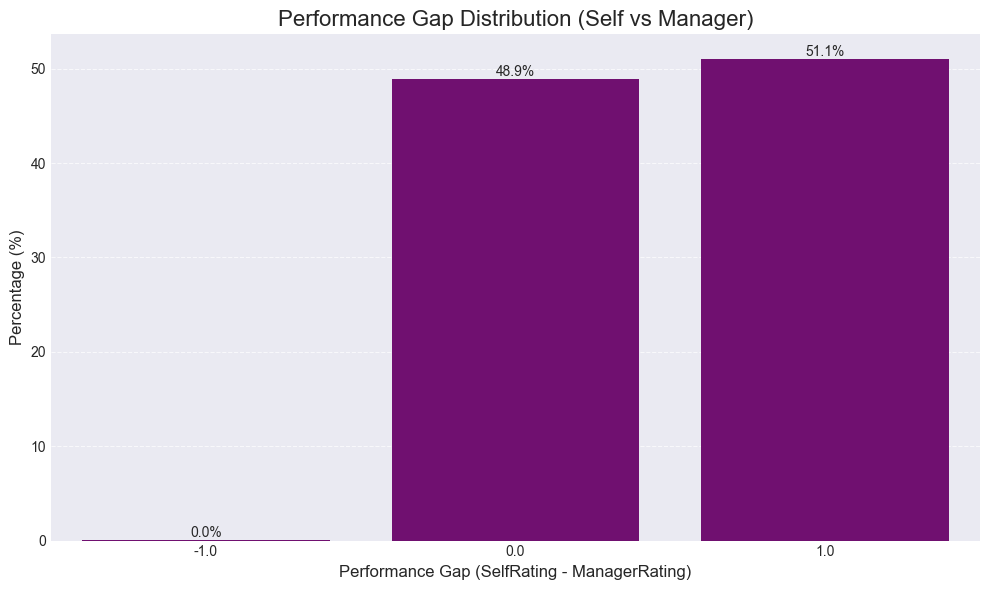

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------------------
# 1. Ensure the rating columns are numeric
# ----------------------------------------------------------------------
perf_full['SelfRating'] = perf_full['SelfRating'].astype(float)
perf_full['ManagerRating'] = perf_full['ManagerRating'].astype(float)

# ----------------------------------------------------------------------
# 2. Calculate the performance gap (Self - Manager)
# ----------------------------------------------------------------------
perf_full['Gap'] = perf_full['SelfRating'] - perf_full['ManagerRating']

# ----------------------------------------------------------------------
# 3. Calculate the percentage distribution of each gap value
# ----------------------------------------------------------------------
gap_counts = perf_full['Gap'].value_counts(normalize=True).sort_index() * 100
gap_counts_df = gap_counts.reset_index()
gap_counts_df.columns = ['Gap', 'Percentage']

# ----------------------------------------------------------------------
# 4. Print the distribution clearly
# ----------------------------------------------------------------------
print("Performance Gap Distribution (Self vs Manager) %:")
for i, row in gap_counts_df.iterrows():
    print(f"Gap {row['Gap']:.1f}: {row['Percentage']:.1f}%")

# ----------------------------------------------------------------------
# 5. Plot the bar chart
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Gap',
    y='Percentage',
    data=gap_counts_df,
    color='purple'
)

plt.title('Performance Gap Distribution (Self vs Manager)', fontsize=16)
plt.xlabel('Performance Gap (SelfRating - ManagerRating)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

# The Performance Gap shows how employees rate themselves compared to their managers.
#  Almost half of the employees (48.9%) give themselves the same rating as their manager,
#  which is a good alignment. Slightly more than half (51.1%) rate themselves one point higher than their manager does,
#  showing a small tendency to overestimate performance. No employees rated themselves lower than their manager.
#  Overall, the gap is very small, indicating good agreement between self and manager ratings.


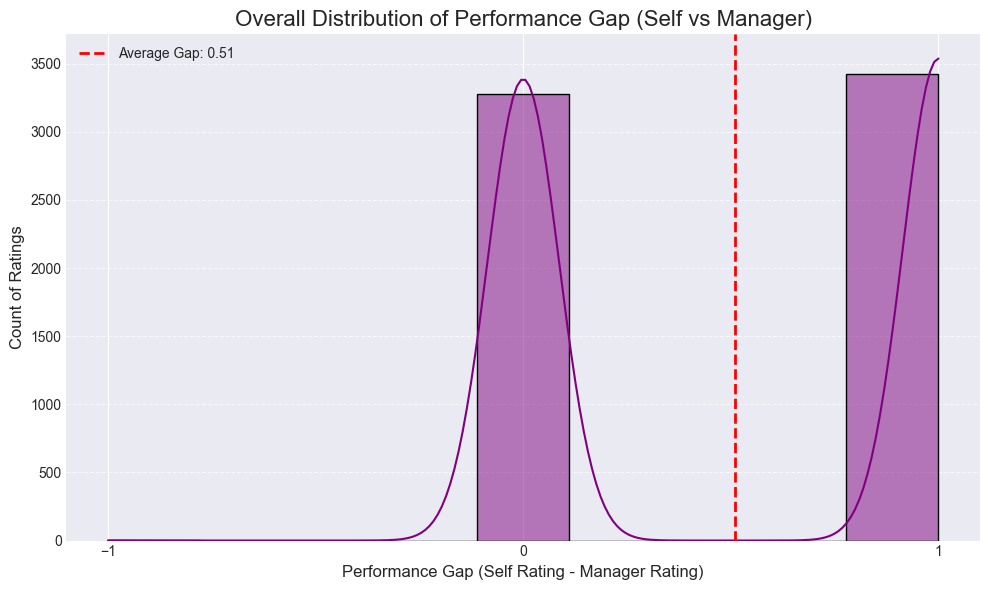

In [56]:
# حساب الفجوة (Gap) كما في الكود الأصلي
perf_full['Gap'] = perf_full['SelfRating'] - perf_full['ManagerRating']

plt.figure(figsize=(10, 6))

# ---- الرسم باستخدام مخطط التوزيع (Histogram) ----
# يوضح عدد مرات تكرار كل قيمة للفجوة (-4, -3, ..., 0, ..., +3, +4)
sns.histplot(perf_full['Gap'], bins=9, kde=True, color='purple', edgecolor='black')

plt.title('Overall Distribution of Performance Gap (Self vs Manager)', fontsize=16)
plt.xlabel('Performance Gap (Self Rating - Manager Rating)', fontsize=12)
plt.ylabel('Count of Ratings', fontsize=12)
plt.xticks(perf_full['Gap'].unique().astype(int)) # عرض الأرقام الصحيحة فقط للفجوة

plt.axvline(perf_full['Gap'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Average Gap: {perf_full["Gap"].mean():.2f}')
# ----------------------------------------------------

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\1608909783.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='SatisfactionLevel', y='Percentage', data=env_counts_df, palette='magma')


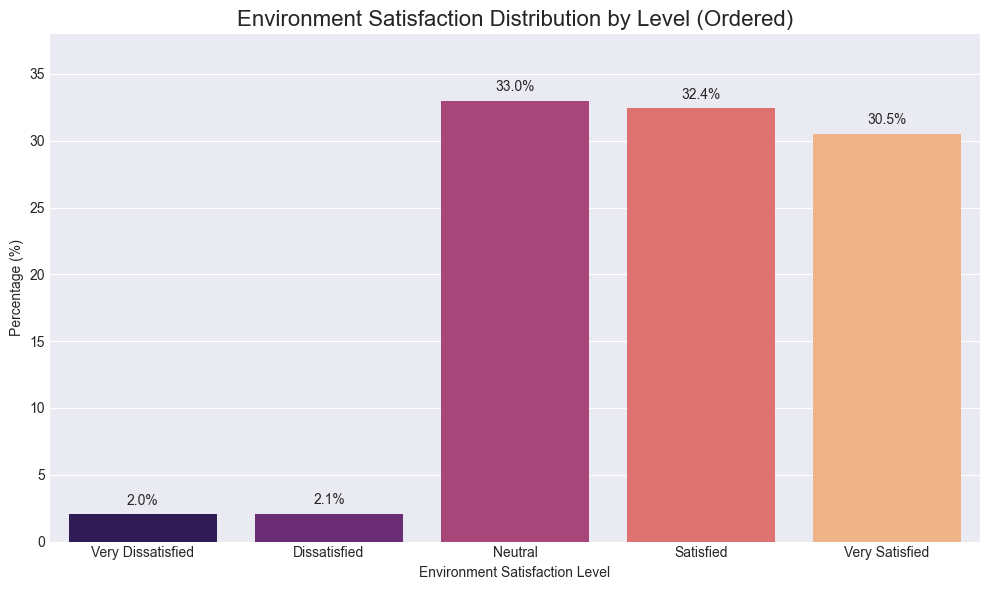

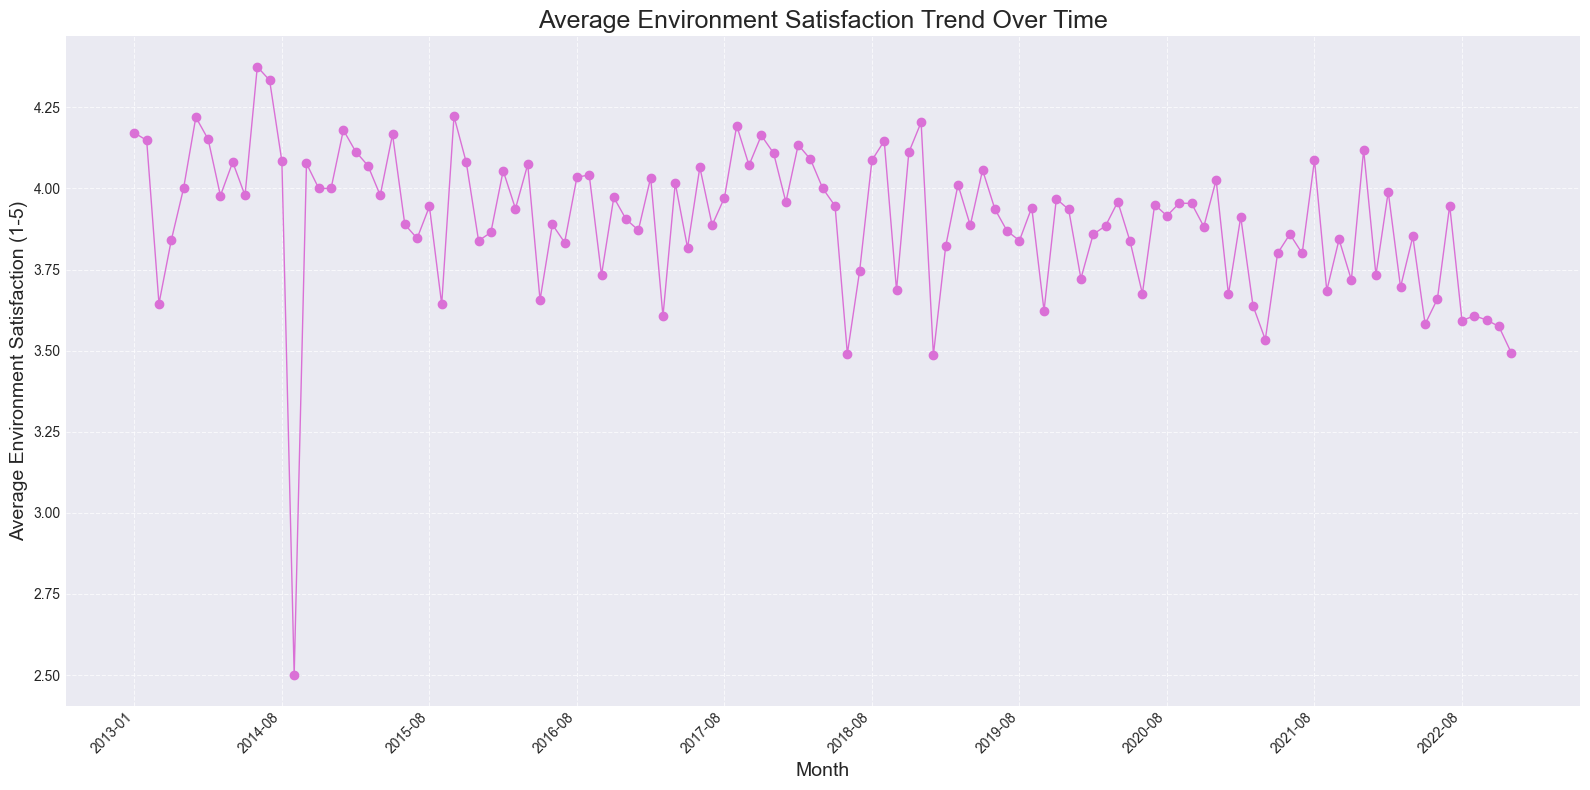

In [64]:


# -----------------------------
# 1. إعداد البيانات
# -----------------------------

# افتراض أن perf_full جدول الأداء مدمج مع employee
# وتعريف الـ satisfaction mapping
satisfaction_map = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

# إضافة الأعمدة الوصفية

perf_full['EnvironmentSatisfactionDesc'] = perf_full['EnvironmentSatisfaction'].map(satisfaction_map)




# -----------------------------
# 3. Environment Satisfaction Distribution
# -----------------------------
env_counts = perf_full['EnvironmentSatisfactionDesc'].value_counts(normalize=True) * 100
env_counts_df = env_counts.reset_index()
env_counts_df.columns = ['SatisfactionLevel', 'Percentage']
env_counts_df['SatisfactionLevel'] = pd.Categorical(
    env_counts_df['SatisfactionLevel'], categories=order, ordered=True
)
env_counts_df = env_counts_df.sort_values('SatisfactionLevel')

plt.figure(figsize=(10,6))
ax = sns.barplot(x='SatisfactionLevel', y='Percentage', data=env_counts_df, palette='magma')
plt.title('Environment Satisfaction Distribution by Level (Ordered)', fontsize=16)
plt.ylabel('Percentage (%)')
plt.xlabel('Environment Satisfaction Level')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.ylim(0, env_counts_df['Percentage'].max()+5)
plt.tight_layout()
plt.show()
# لو عمود Month مش موجود
perf_full['Month'] = perf_full['ReviewDate'].dt.to_period('M')

# المتوسط لكل شهر
env_trend = perf_full.groupby('Month')['EnvironmentSatisfaction'].mean().reset_index()

# تحويل Month لسلسلة نصية للرسم
env_trend['Month_Str'] = env_trend['Month'].astype(str)
plt.figure(figsize=(16, 8))

plt.plot(
    env_trend['Month_Str'], 
    env_trend['EnvironmentSatisfaction'], 
    marker='o', 
    linestyle='-', 
    color='orchid', 
    linewidth=1
)

plt.title('Average Environment Satisfaction Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Environment Satisfaction (1-5)', fontsize=14)

# عرض كل 12 شهرًا لتجنب التداخل
N = 12
xticks_positions = env_trend.index[::N]
xticks_labels = env_trend['Month_Str'][::N]

plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()








In [73]:

employee['HireDate'] = pd.to_datetime(employee['HireDate'])

# -------------------------------


# 5️⃣ Work-Life Balance Distribution (Grouped)

perf_full = performance.merge(employee[['EmployeeID','Attrition']], on='EmployeeID', how='left')

# Work-Life Balance Distribution (Grouped)
wlb_attrition = perf_full.groupby(['WorkLifeBalance','Attrition']).size().reset_index(name='Count')
#============================
print("\nWork-Life Balance Distribution by Attrition:")
print(wlb_attrition)




Work-Life Balance Distribution by Attrition:
   WorkLifeBalance Attrition  Count
0                1        No     84
1                1       Yes     37
2                2        No   1134
3                2       Yes    568
4                3        No   1090
5                3       Yes    580
6                4        No   1146
7                4       Yes    560
8                5        No    994
9                5       Yes    516


In [74]:
# 2️⃣ Attrition Rate by Department
# -------------------------------
dept_attrition = employee.groupby('Department')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
dept_attrition.columns = ['Department', 'AttritionRatePercent']
dept_attrition.to_csv('AttritionRateByDepartment.csv', index=False)

# -------------------------------
# 3️⃣ Attrition by Overtime
# -------------------------------
overtime_attrition = employee.groupby('OverTime')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
overtime_attrition.columns = ['OvertimeStatus', 'AttritionRatePercent']
overtime_attrition.to_csv('AttritionByOvertime.csv', index=False)
# Print results
print("\nAttrition Rate by Overtime (%):")
print(overtime_attrition)


Attrition Rate by Overtime (%):
  OvertimeStatus  AttritionRatePercent
0             No                 10.44
1            Yes                 30.53


In [72]:
# 4️⃣ Attrition by Tenure & Age
# -------------------------------
#  (Age Groups)
bins_age = [18, 25, 35, 45, 55, 65]
labels_age = ['18-25','26-35','36-45','46-55','56-65']
employee['AgeGroup'] = pd.cut(employee['Age'], bins=bins_age, labels=labels_age, right=True)

tenure_age_attrition = employee.groupby(['AgeGroup','YearsAtCompany'])['Attrition'].apply(
    lambda x: (x=='Yes').mean()*100
).reset_index()
tenure_age_attrition.columns = ['AgeGroup','YearsAtCompany','AverageAttritionRate']
tenure_age_attrition.to_csv('AttritionByTenureAndAge.csv', index=False)
print("\nAttrition by Tenure and Age (%):")
print(tenure_age_attrition)


Attrition by Tenure and Age (%):
   AgeGroup  YearsAtCompany  AverageAttritionRate
0     18-25               0                 37.61
1     18-25               1                 34.65
2     18-25               2                 15.71
3     18-25               3                 12.26
4     18-25               4                  6.67
5     18-25               5                  4.55
6     18-25               6                  2.22
7     18-25               7                  9.09
8     18-25               8                   NaN
9     18-25               9                   NaN
10    18-25              10                   NaN
11    26-35               0                 25.58
12    26-35               1                 43.48
13    26-35               2                 35.29
14    26-35               3                 37.04
15    26-35               4                 77.78
16    26-35               5                 36.17
17    26-35               6                 18.18
18    26-35     

C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\1452378876.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_age_attrition = employee.groupby(['AgeGroup','YearsAtCompany'])['Attrition'].apply(


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\348812492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


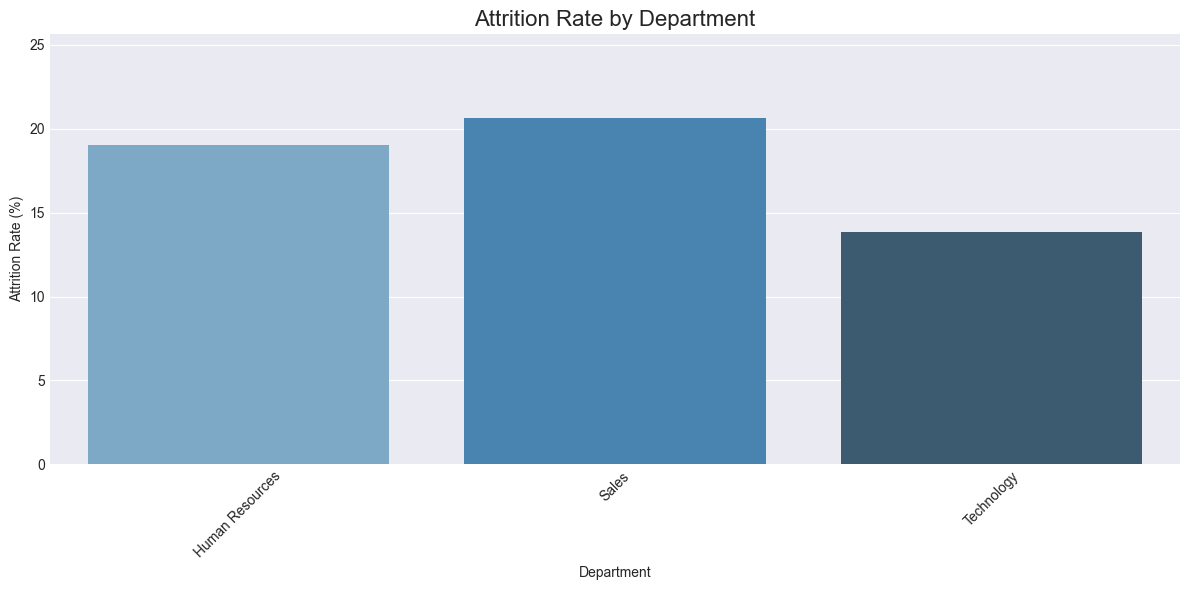

In [75]:
##1️⃣ Attrition Rate by Department (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x='Department', 
    y='AttritionRatePercent', 
    data=dept_attrition,
    palette='Blues_d'
)
plt.title('Attrition Rate by Department', fontsize=16)
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylim(0, dept_attrition['AttritionRatePercent'].max()+5)
plt.tight_layout()
plt.show()

C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\1247105599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


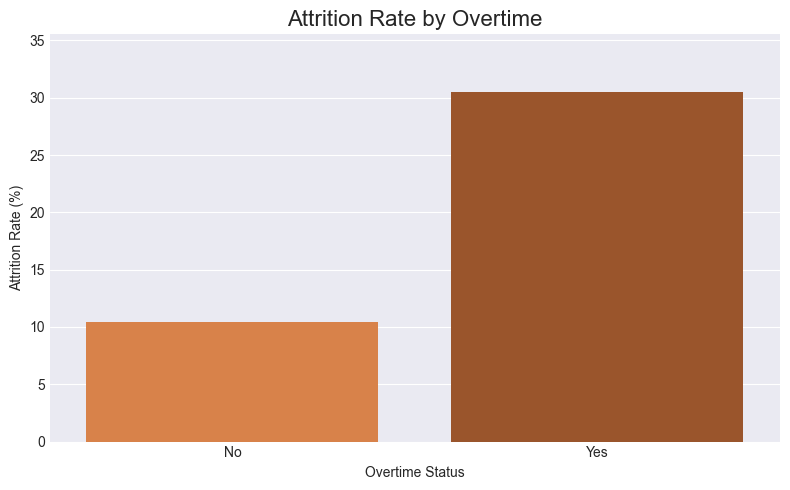

In [76]:
##2️⃣ Attrition by Overtime (Bar Chart)

plt.figure(figsize=(8,5))
sns.barplot(
    x='OvertimeStatus', 
    y='AttritionRatePercent', 
    data=overtime_attrition,
    palette='Oranges_d'
)
plt.title('Attrition Rate by Overtime', fontsize=16)
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Overtime Status')
plt.ylim(0, overtime_attrition['AttritionRatePercent'].max()+5)
plt.tight_layout()
plt.show()


Attrition Rate by Age Group & Tenure (%):
YearsAtCompany    0     1     2     3     4     5     6    7    8     9    10
AgeGroup                                                                     
18-25          37.60 34.70 15.70 12.30  6.70  4.50  2.20 9.10  NaN   NaN  NaN
26-35          25.60 43.50 35.30 37.00 77.80 36.20 18.20 7.10 4.30  2.00 0.00
36-45          40.00 22.70 12.50 10.00  8.30  0.00  0.00 0.00 6.90  3.60 0.00
46-55           0.00 12.50  0.00  0.00  0.00   NaN   NaN  NaN 0.00 14.30 4.80
56-65            NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN  NaN


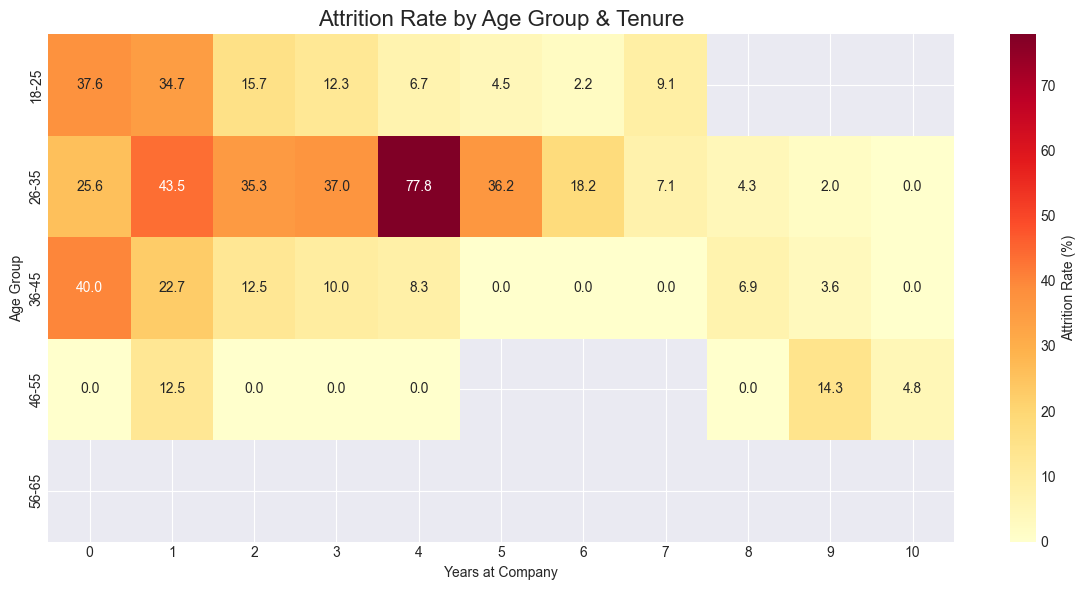

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Create pivot table for Heatmap
# -------------------------------
tenure_age_pivot = tenure_age_attrition.pivot(
    index='AgeGroup',
    columns='YearsAtCompany',
    values='AverageAttritionRate'
)

# -------------------------------
# 2. Print the pivot table
# -------------------------------
print("\nAttrition Rate by Age Group & Tenure (%):")
print(tenure_age_pivot.round(1))  # Round to 1 decimal for readability

# -------------------------------
# 3. Plot the heatmap
# -------------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(
    tenure_age_pivot, 
    annot=True,       # Show numbers in cells
    fmt=".1f",        # One decimal
    cmap='YlOrRd',    # Color palette
    cbar_kws={'label': 'Attrition Rate (%)'}
)
plt.title('Attrition Rate by Age Group & Tenure', fontsize=16)
plt.ylabel('Age Group')
plt.xlabel('Years at Company')
plt.tight_layout()
plt.show()


In [ ]:
# The table shows attrition rate by age group and tenure (%):

# Young employees (18-25): High attrition in the first 1–2 years, then drops sharply.

# Mid-age employees (26-35): Moderate to high attrition in the first 5 years, peaking at year 4, then decreases.

# Older employees (36-45): High attrition at year 0, then very low after year 4.

# Senior employees (46-55): Generally low attrition, with minor spikes in some years.

# Oldest employees (56-65): No data available.

# Summary: Attrition is highest in early tenure for young employees and around 3–5 years for mid-age employees, while long-term employees tend to stay.

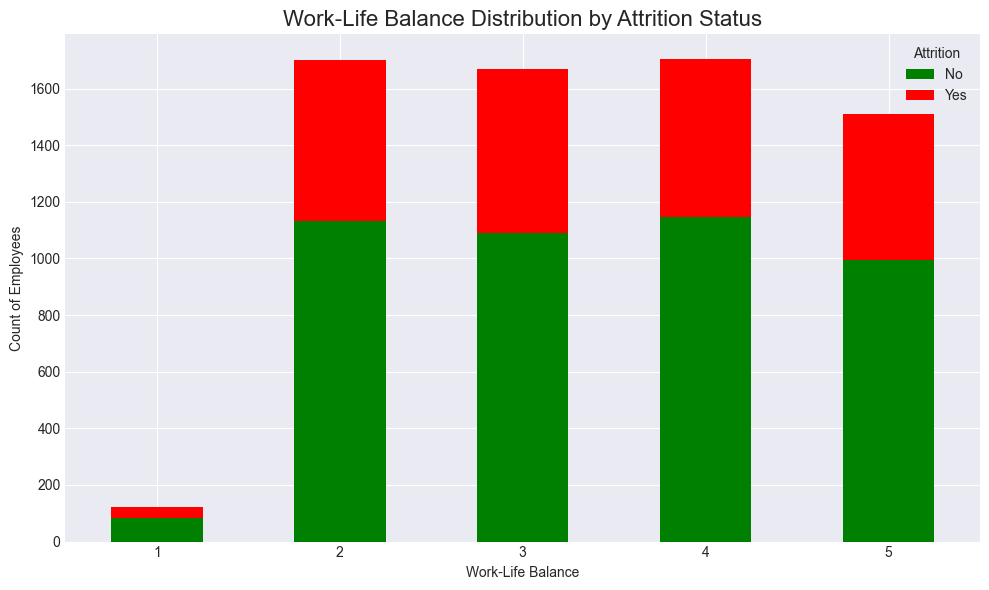

In [31]:
##Work-Life Balance Distribution (Stacked Bar Chart)
wlb_pivot = wlb_attrition.pivot(index='WorkLifeBalance', columns='Attrition', values='Count').fillna(0)

wlb_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,6),
    color=['green','red']
)
plt.title('Work-Life Balance Distribution by Attrition Status', fontsize=16)
plt.ylabel('Count of Employees')
plt.xlabel('Work-Life Balance')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()



Ethnicity Distribution (%):
                   Ethnicity  Percentage
0                      White       70.90
1  Black or African American       15.00
2    Asian or Asian American        9.20
3                      Other        4.90


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\3002661518.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Ethnicity', y='Percentage', data=ethnicity_dist, palette='Set2')


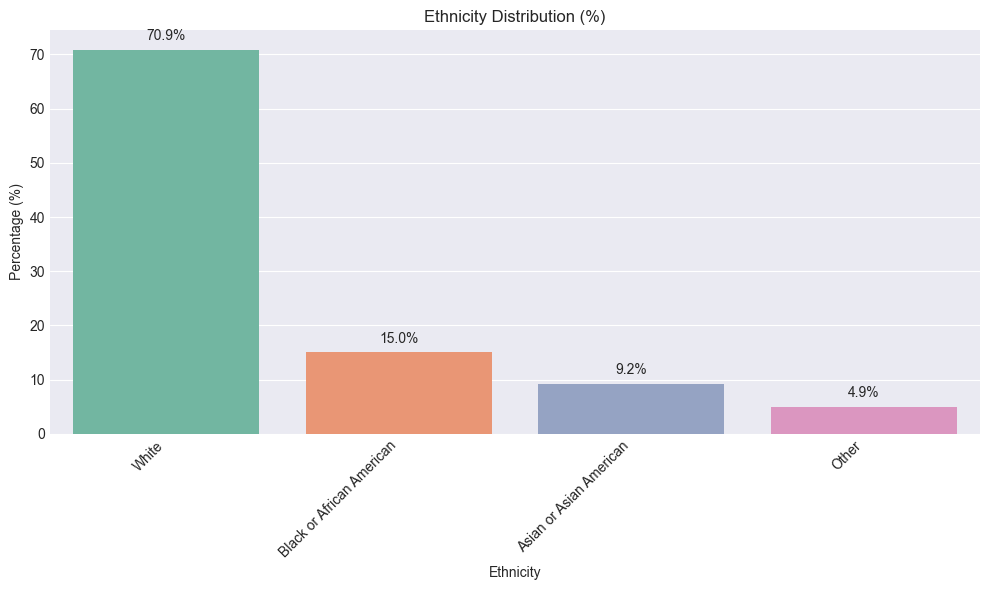


Employee Count by Job Role & Department:
            JobRole       Department  Count
0           Analyst  Human Resources     39
1           Analyst            Sales     66
2           Analyst       Technology     77
3          Engineer  Human Resources     33
4          Engineer            Sales     70
5          Engineer       Technology     85
6      HR Executive  Human Resources     47
7      HR Executive            Sales     77
8      HR Executive       Technology    101
9           Manager  Human Resources     32
10          Manager            Sales     74
11          Manager       Technology     80
12  Sales Executive  Human Resources     51
13  Sales Executive            Sales     63
14  Sales Executive       Technology    105


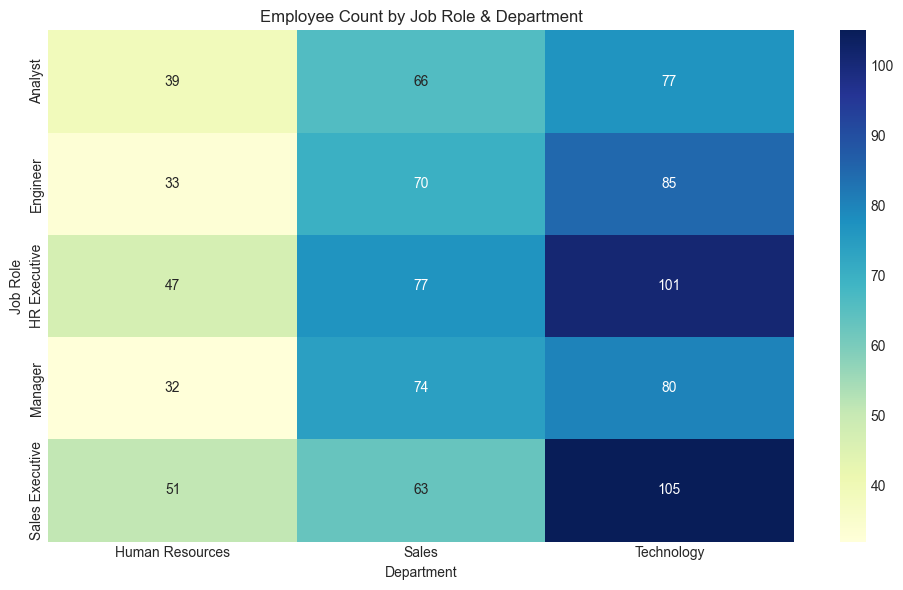


Education Level Distribution (%):
  EducationLevel  Percentage
1              1       20.90
4              2       17.10
0              3       21.10
3              4       20.10
2              5       20.80


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\3002661518.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='EducationLevel', y='Percentage', data=education_dist, palette='coolwarm')


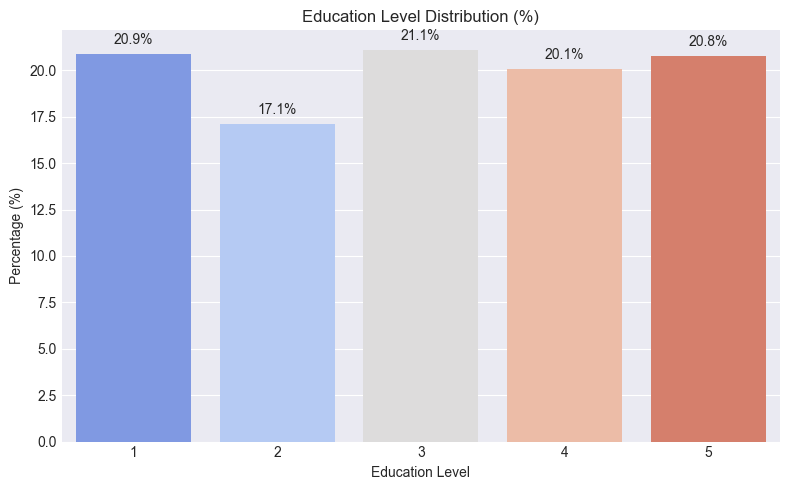

In [ ]:

# -------------------------------
# 1. Ethnicity Distribution
# -------------------------------
ethnicity_dist = employee['Ethnicity'].value_counts(normalize=True) * 100
ethnicity_dist = ethnicity_dist.reset_index()
ethnicity_dist.columns = ['Ethnicity', 'Percentage']
ethnicity_dist = ethnicity_dist.sort_values('Percentage', ascending=False)

print("\nEthnicity Distribution (%):")
print(ethnicity_dist.round(1))

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Ethnicity', y='Percentage', data=ethnicity_dist, palette='Set2')
plt.title('Ethnicity Distribution (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Ethnicity')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Employee Count by Job Role & Department
# -------------------------------
job_dept_count = employee.groupby(['JobRole','Department']).size().reset_index(name='Count')
print("\nEmployee Count by Job Role & Department:")
print(job_dept_count)

plt.figure(figsize=(10,6))
pivot_table = job_dept_count.pivot(index='JobRole', columns='Department', values='Count')
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Employee Count by Job Role & Department')
plt.ylabel('Job Role')
plt.xlabel('Department')
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Education Level Distribution
# -------------------------------
education_dist = employee['Education'].value_counts(normalize=True) * 100
education_dist = education_dist.reset_index()
education_dist.columns = ['EducationLevel', 'Percentage']
education_order = sorted(employee['Education'].unique())
education_dist['EducationLevel'] = pd.Categorical(education_dist['EducationLevel'], categories=education_order, ordered=True)
education_dist = education_dist.sort_values('EducationLevel')

print("\nEducation Level Distribution (%):")
print(education_dist.round(1))

plt.figure(figsize=(8,5))
ax = sns.barplot(x='EducationLevel', y='Percentage', data=education_dist, palette='coolwarm')
plt.title('Education Level Distribution (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\32219242.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Percentage', data=age_dist, palette='Blues_d')


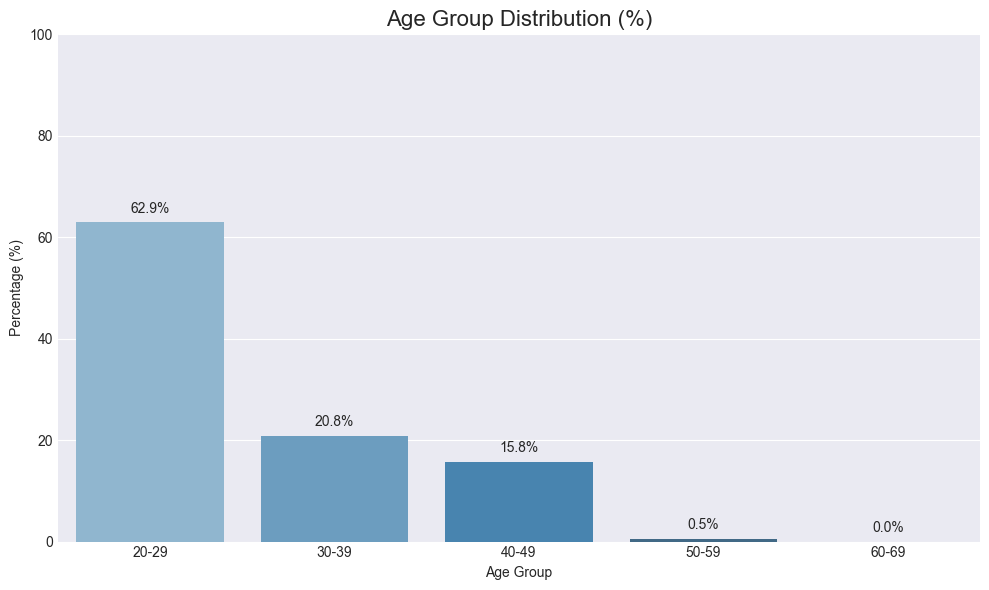

✅ Age group distribution saved to 'AgeGroupDistribution.csv'


In [ ]:
bins = [20, 30, 40, 50, 60, 70]  
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df_employee['AgeGroup'] = pd.cut(df_employee['Age'], bins=bins, labels=labels, right=False)

age_dist = df_employee['AgeGroup'].value_counts().sort_index().reset_index()
age_dist.columns = ['AgeGroup', 'Count']


age_dist['Percentage'] = age_dist['Count'] / age_dist['Count'].sum() * 100

# -----------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Percentage', data=age_dist, palette='Blues_d')
plt.title('Age Group Distribution (%)', fontsize=16)
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')

plt.ylim(0, 100)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='center', xytext=(0,10), textcoords='offset points')

plt.tight_layout()
plt.show()

age_dist.to_csv('AgeGroupDistribution.csv', index=False)
print("✅ Age group distribution saved to 'AgeGroupDistribution.csv'")


C:\Users\sayds\AppData\Local\Temp\ipykernel_19620\2348431579.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Department', y='AttritionRate (%)', data=attrition_by_dept, palette='Reds_d')


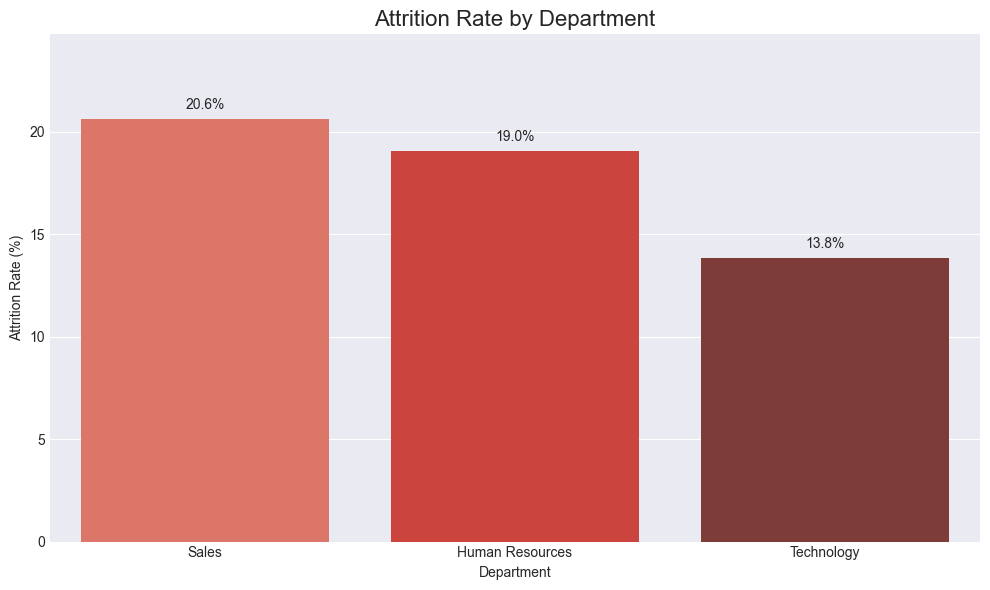

C:\Users\sayds\AppData\Local\Temp\ipykernel_19620\2348431579.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


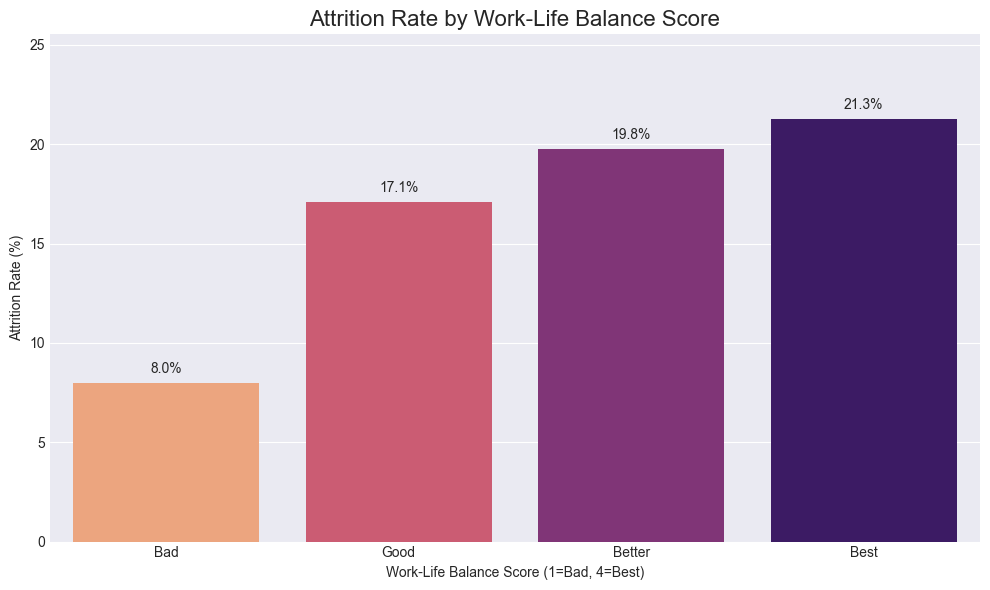

C:\Users\sayds\AppData\Local\Temp\ipykernel_19620\2348431579.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='OverTime', y='AttritionRate (%)', data=attrition_by_overtime.sort_values(by='OverTime', ascending=False), palette='PuOr')


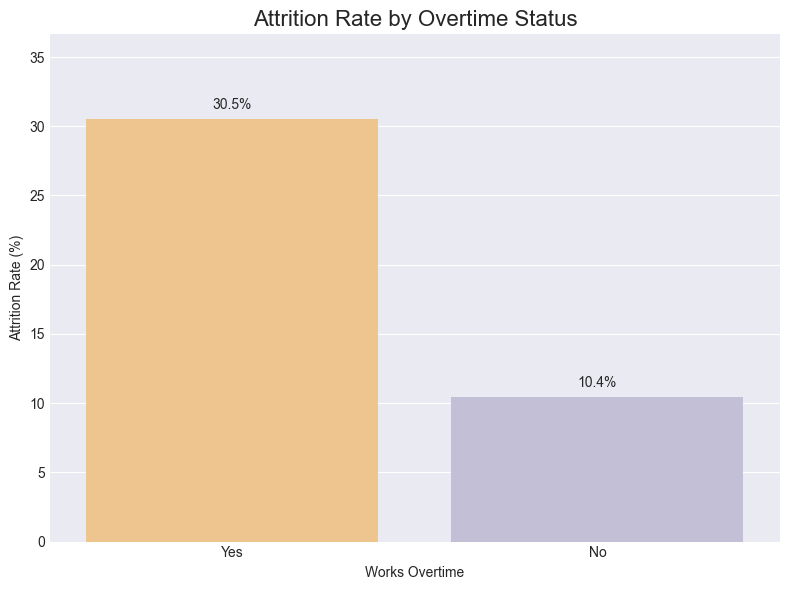

In [ ]:
# Plotting style setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('pastel')

# ----------------------------------------------------------------------
# I. Data Loading and Merging
# Load actual data from CSV files
# ----------------------------------------------------------------------

# Load Employee data which contains Attrition, Department, OverTime
employee = pd.read_csv('Employee.csv') 

# Load Performance data which contains WorkLifeBalance
performance = pd.read_csv('PerformanceRating.csv')

# Merge WorkLifeBalance from performance into the employee dataframe
# This is necessary because WorkLifeBalance is in PerformanceRating.csv, not Employee.csv
# We keep the first instance of WLB per employee if duplicates exist
perf_full = employee.merge(
    performance[['EmployeeID', 'WorkLifeBalance']], 
    on='EmployeeID', 
    how='left'
).drop_duplicates(subset=['EmployeeID'], keep='first')

# Convert WorkLifeBalance to numeric for aggregation
perf_full['WorkLifeBalance'] = pd.to_numeric(
    perf_full['WorkLifeBalance'], errors='coerce'
)


# ----------------------------------------------------------------------
# II. Key Performance Indicator (KPI) Calculations
# ----------------------------------------------------------------------

# 1. Attrition Rate by Department
attrition_by_dept = employee.groupby('Department')['Attrition'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
attrition_by_dept = attrition_by_dept[['Yes']].rename(columns={'Yes': 'AttritionRate (%)'}).reset_index()
attrition_by_dept = attrition_by_dept.sort_values(by='AttritionRate (%)', ascending=False)
attrition_by_dept.to_csv('attrition_rate_by_dept.csv', index=False) 

# 2. Attrition Rate by Overtime
attrition_by_overtime = employee.groupby('OverTime')['Attrition'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
attrition_by_overtime = attrition_by_overtime[['Yes']].rename(columns={'Yes': 'AttritionRate (%)'}).reset_index()
attrition_by_overtime.to_csv('attrition_by_overtime.csv', index=False)

# 3. Attrition Rate by WorkLifeBalance (Calculated using the merged table)
wlb_attrition_rate = perf_full.groupby('WorkLifeBalance')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='AttritionRate (%)')

# Add descriptive labels for better visualization
wlb_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
wlb_attrition_rate['WLB_Desc'] = wlb_attrition_rate['WorkLifeBalance'].map(wlb_map)


# ----------------------------------------------------------------------
# III. Visualizations
# ----------------------------------------------------------------------

# A. Attrition Rate by Department Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Department', y='AttritionRate (%)', data=attrition_by_dept, palette='Reds_d')
plt.title('Attrition Rate by Department', fontsize=16)
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.ylim(0, attrition_by_dept['AttritionRate (%)'].max() * 1.2)

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()


# B. Attrition Rate by WorkLifeBalance Bar Plot (Replaced Box Plot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='WLB_Desc',
    y='AttritionRate (%)',
    # Sort by WLB score ascending (Bad to Best)
    data=wlb_attrition_rate.sort_values(by='WorkLifeBalance'),
    palette='magma_r' 
)
plt.title('Attrition Rate by Work-Life Balance Score', fontsize=16)
plt.xlabel('Work-Life Balance Score (1=Bad, 4=Best)')
plt.ylabel('Attrition Rate (%)')
plt.ylim(0, wlb_attrition_rate['AttritionRate (%)'].max() * 1.2)

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()


# C. Attrition Rate by Overtime Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='OverTime', y='AttritionRate (%)', data=attrition_by_overtime.sort_values(by='OverTime', ascending=False), palette='PuOr')
plt.title('Attrition Rate by Overtime Status', fontsize=16)
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Works Overtime')
plt.ylim(0, attrition_by_overtime['AttritionRate (%)'].max() * 1.2)

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
n_employees = 1000
dates_range = pd.to_datetime(pd.date_range(start='2020-01-01', end='2024-12-31', freq='M'))
employee = pd.DataFrame({
    'EmployeeID': np.arange(n_employees),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n_employees),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], n_employees),
    'Department': np.random.choice(['Human Resources', 'Sales', 'Technology'], n_employees),
    'JobRole': np.random.choice(['Manager', 'Engineer', 'Analyst', 'HR Executive'], n_employees),
    'EducationField': np.random.choice(['Technical Degree', 'Marketing', 'Computer Science', 'Other'], n_employees),
})

perf_full = pd.DataFrame({
    'EmployeeID': np.random.choice(employee['EmployeeID'], size=n_employees * 4),
    'JobSatisfaction': np.random.randint(1, 6, n_employees * 4),
    'EnvironmentSatisfaction': np.random.randint(1, 6, n_employees * 4),
})

merged_data = pd.merge(
    employee, 
    perf_full, 
    on='EmployeeID', 
    how='inner'
)


# 1. Avg Environment Satisfaction by Role & Dept)
avg_env_satis_role_dept = merged_data.groupby(['JobRole', 'Department'])['EnvironmentSatisfaction'].mean().reset_index()
avg_env_satis_role_dept.rename(
    columns={'EnvironmentSatisfaction': 'Avg EnvironmentSatisfaction'}, 
    inplace=True
)
avg_env_satis_role_dept.to_csv('avg_env_satis_role_dept.csv', index=False)
print("avg_env_satis_role_dept.csv")


# 2. Avg Job Satisfaction by Role & Education)
avg_job_satis_role_edu = merged_data.groupby(['JobRole', 'EducationField'])['JobSatisfaction'].mean().reset_index()
avg_job_satis_role_edu.rename(
    columns={'JobSatisfaction': 'Avg JobSatisfaction'}, 
    inplace=True
)
avg_job_satis_role_edu.to_csv('avg_job_satis_role_edu.csv', index=False)
print("avg_job_satis_role_edu.csv")


# 3. Satisfaction Distribution by Demographics 
satis_by_demographics = merged_data.groupby(['Gender', 'MaritalStatus']).agg(
    AvgJobSatisfaction=('JobSatisfaction', 'mean'),
    AvgEnvironmentSatisfaction=('EnvironmentSatisfaction', 'mean'),
    Count=('EmployeeID', 'count')
).reset_index()
satis_by_demographics.to_csv('satis_by_demographics.csv', index=False)
print("satis_by_demographics.csv")

avg_env_satis_role_dept.csv
avg_job_satis_role_edu.csv
satis_by_demographics.csv


C:\Users\sayds\AppData\Local\Temp\ipykernel_19620\1612559309.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_range = pd.to_datetime(pd.date_range(start='2020-01-01', end='2024-12-31', freq='M'))


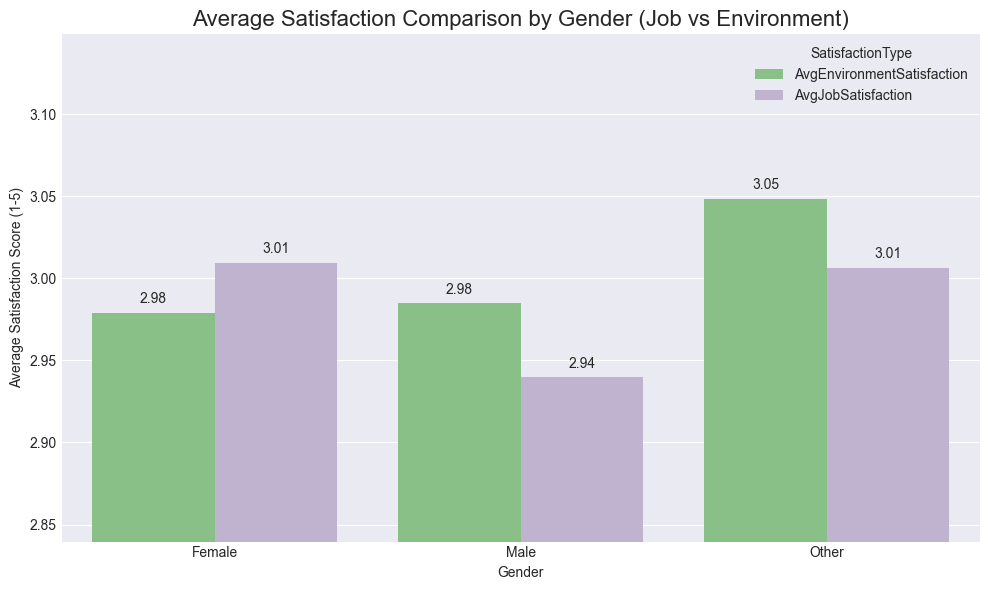

In [ ]:
satis_by_demographics = pd.read_csv('satis_by_demographics.csv')

satis_long_gender = satis_by_demographics.melt(
    id_vars=['Gender'],
    value_vars=['AvgJobSatisfaction', 'AvgEnvironmentSatisfaction'],
    var_name='SatisfactionType',
    value_name='AverageScore'
)

satis_long_gender = satis_long_gender.groupby(['Gender', 'SatisfactionType'])['AverageScore'].mean().reset_index()


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Gender', 
    y='AverageScore', 
    hue='SatisfactionType', 
    data=satis_long_gender, 
    palette='Accent'
)

plt.title('Average Satisfaction Comparison by Gender (Job vs Environment)', fontsize=16)
plt.ylabel('Average Satisfaction Score (1-5)')
plt.xlabel('Gender')
plt.ylim(satis_long_gender['AverageScore'].min() - 0.1, satis_long_gender['AverageScore'].max() + 0.1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=10)
plt.tight_layout()
plt.show()

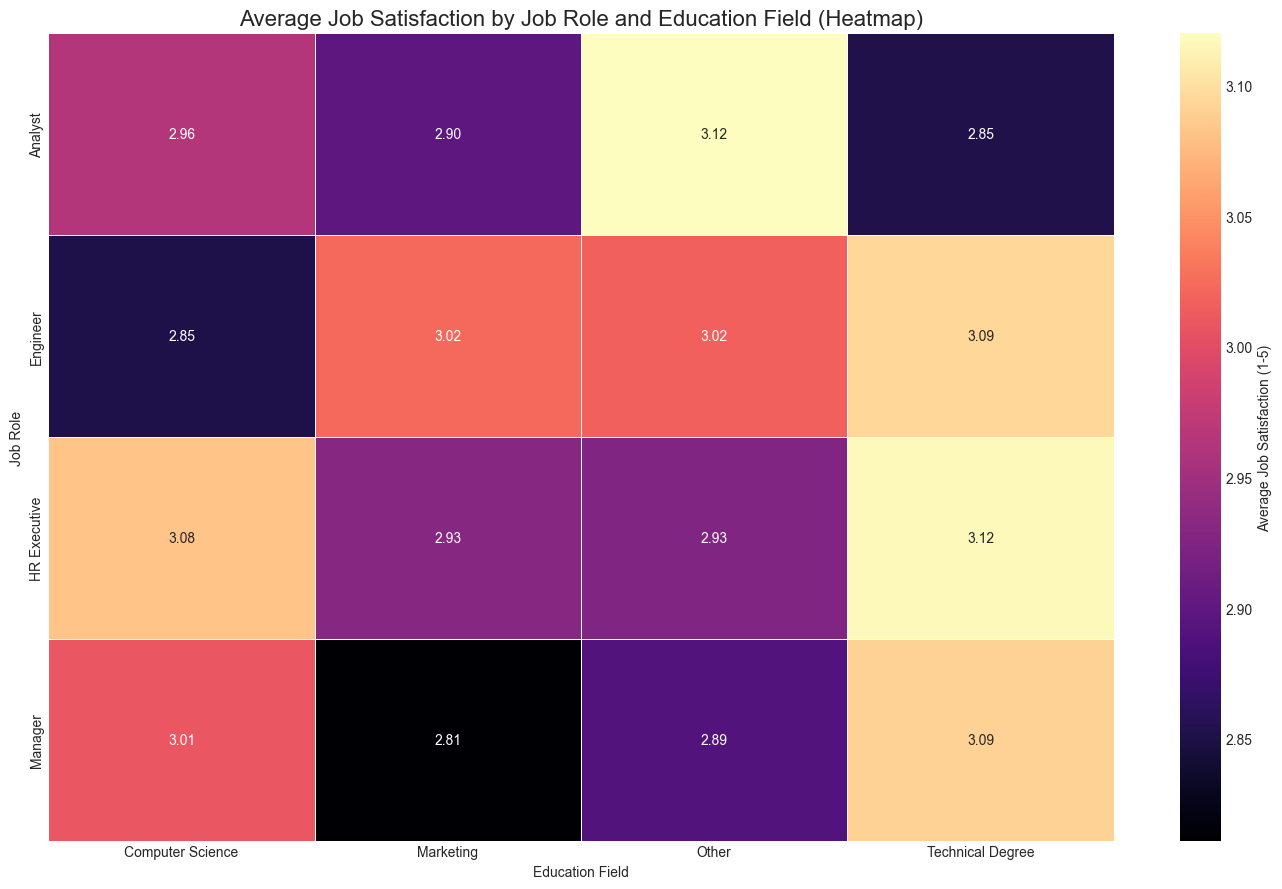

In [ ]:

avg_job_satis_role_edu = pd.read_csv('avg_job_satis_role_edu.csv')
job_heatmap_data = avg_job_satis_role_edu.pivot(
    index='JobRole', 
    columns='EducationField', 
    values='Avg JobSatisfaction'
)

plt.figure(figsize=(14, 9))
sns.heatmap(
    job_heatmap_data,
    annot=True, 
    fmt='.2f', 
    cmap='magma', 
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Average Job Satisfaction (1-5)'}
)
plt.title('Average Job Satisfaction by Job Role and Education Field (Heatmap)', fontsize=16)
plt.ylabel('Job Role')
plt.xlabel('Education Field')
plt.tight_layout()
plt.show()

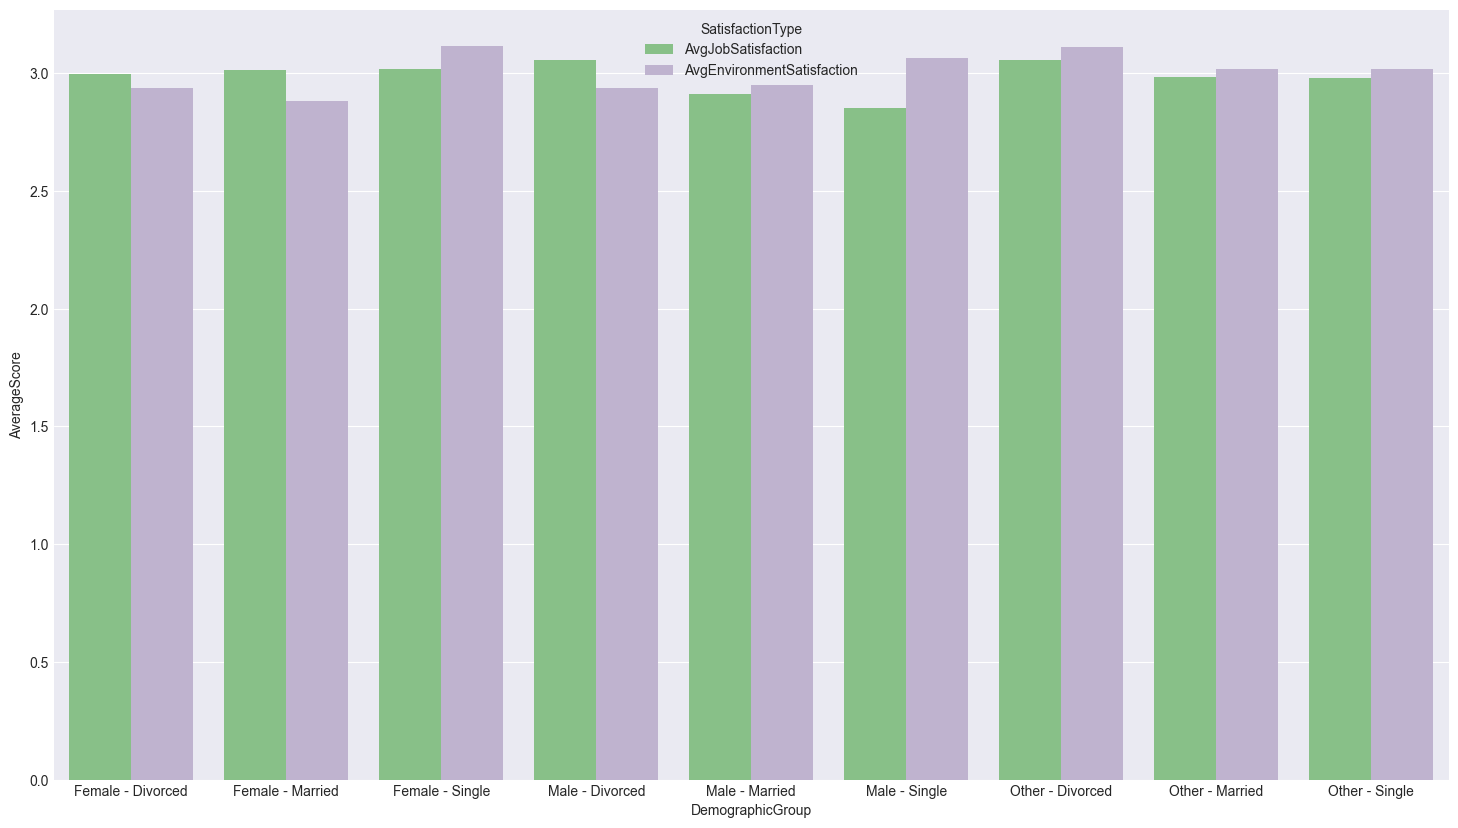

In [ ]:

satis_by_demographics = pd.read_csv('satis_by_demographics.csv')

satis_by_demographics['DemographicGroup'] = (
    satis_by_demographics['Gender'] + ' - ' + satis_by_demographics['MaritalStatus']
)
satis_long_combined = satis_by_demographics.melt(
    id_vars=['DemographicGroup'],
    value_vars=['AvgJobSatisfaction', 'AvgEnvironmentSatisfaction'],
    var_name='SatisfactionType',
    value_name='AverageScore'
)

plt.figure(figsize=(18, 10))
ax = sns.barplot(
    x='DemographicGroup', 
    y='AverageScore', 
    hue='SatisfactionType', 
    data=satis_long_combined, 
    palette='Accent'
)

plt.show()

   TrainingOpportunitiesTaken  AttritionRate (%)
0                           0              33.30
1                           1              34.50
2                           2              34.30
3                           3              30.30

Attrition by Training Opportunities:
   TrainingOpportunitiesTaken  AttritionRate (%)
0                           0              33.30
1                           1              34.50
2                           2              34.30
3                           3              30.30


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\1152817971.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TrainingOpportunitiesTaken', y='AttritionRate (%)', data=attrition_by_training, palette='viridis')


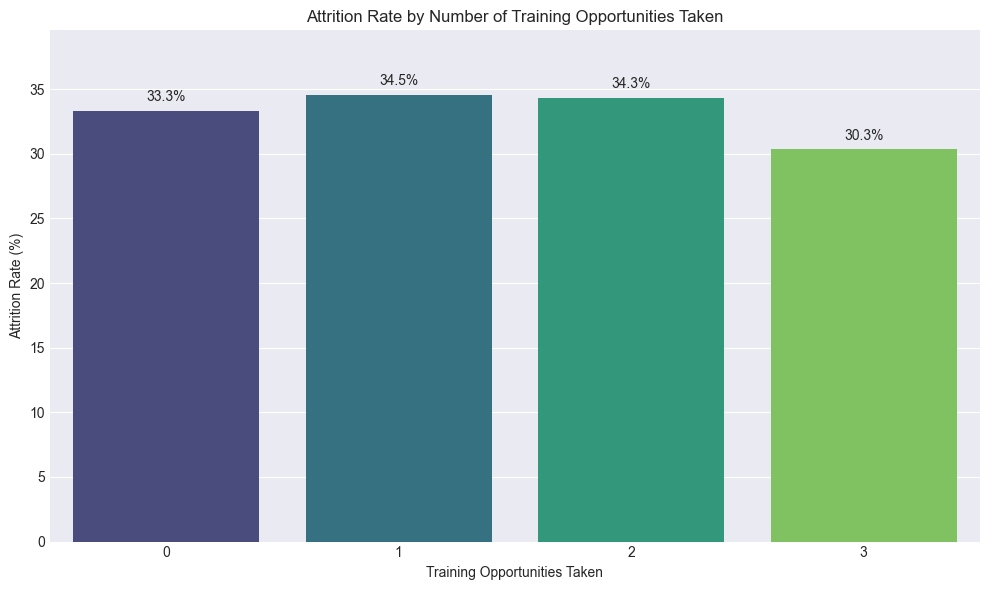


Attrition by Service Tenure:
  Attrition  AvgYearsSinceLastPromotion  AvgYearsWithCurrManager
0        No                        3.80                     2.50
1       Yes                        1.40                     1.00


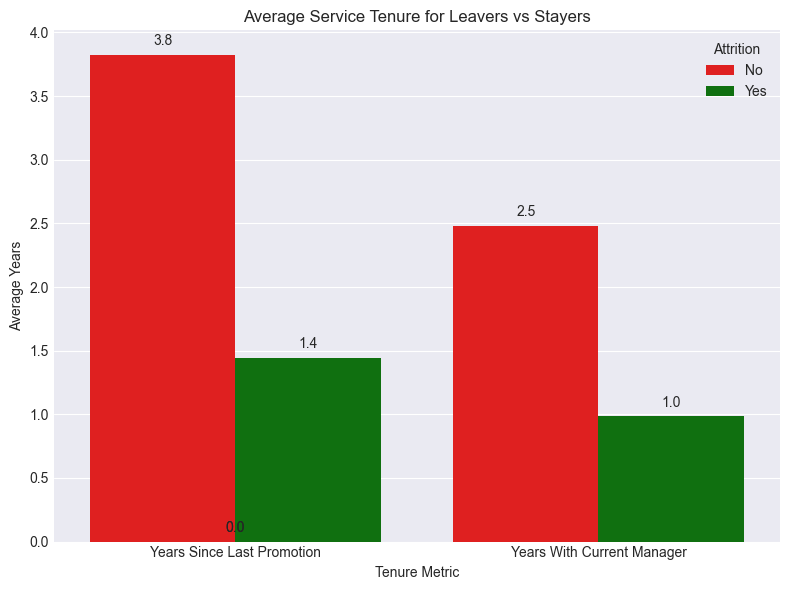


Average Job Satisfaction by Travel Frequency and Home Distance:
         BusinessTravel  DistanceFromHome (KM)  AvgJobSatisfaction
0    Frequent Traveller                      1                3.33
1    Frequent Traveller                      2                3.30
2    Frequent Traveller                      3                3.47
3    Frequent Traveller                      4                3.57
4    Frequent Traveller                      5                3.71
5    Frequent Traveller                      6                3.38
6    Frequent Traveller                      7                3.66
7    Frequent Traveller                      8                3.24
8    Frequent Traveller                      9                3.12
9    Frequent Traveller                     10                3.54
10   Frequent Traveller                     11                4.20
11   Frequent Traveller                     12                3.35
12   Frequent Traveller                     13                3.

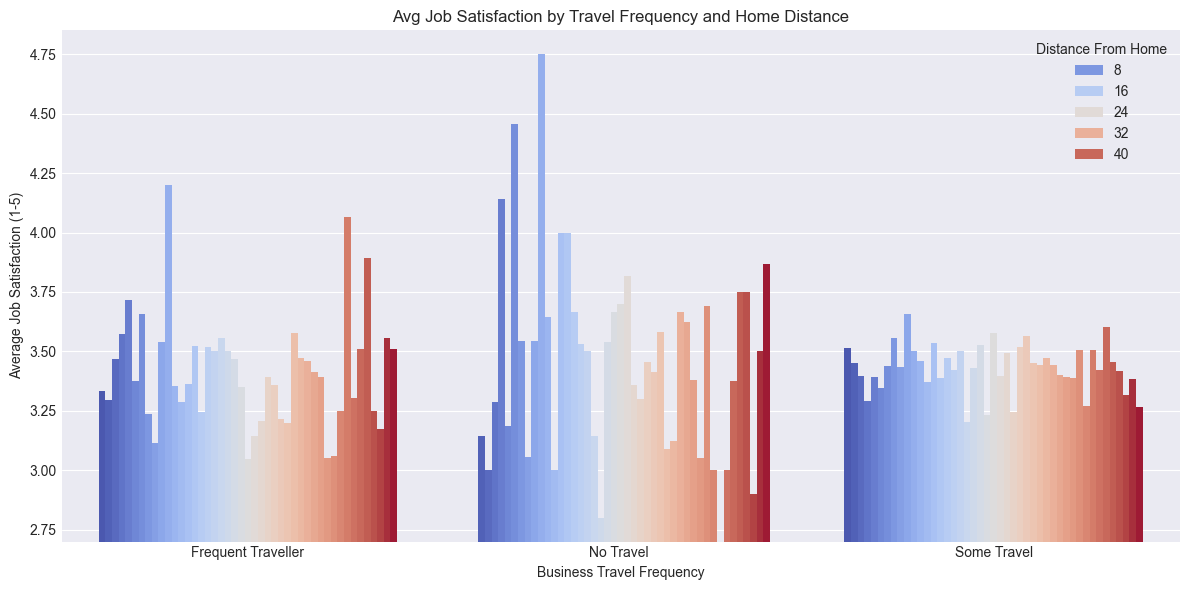

In [ ]:
# Merge employee with performance data
perf_full = performance.merge(
    employee[['EmployeeID','Attrition','DistanceFromHome (KM)','BusinessTravel']], 
    on='EmployeeID', 
    how='left'
)

attrition_by_training = (
    perf_full.groupby('TrainingOpportunitiesTaken')['Attrition']
    .apply(lambda x: (x=='Yes').mean()*100)
    .reset_index(name='AttritionRate (%)')
)
print(attrition_by_training.round(1))

# -------------------------------
# 1. Attrition by Training Opportunities
# -------------------------------
attrition_by_training = (
    perf_full.groupby('TrainingOpportunitiesTaken')['Attrition']
    .apply(lambda x: (x=='Yes').mean()*100)
    .reset_index(name='AttritionRate (%)')
)
print("\nAttrition by Training Opportunities:")
print(attrition_by_training.round(1))

# Bar Chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='TrainingOpportunitiesTaken', y='AttritionRate (%)', data=attrition_by_training, palette='viridis')
plt.title('Attrition Rate by Number of Training Opportunities Taken')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Training Opportunities Taken')
plt.ylim(0, attrition_by_training['AttritionRate (%)'].max() + 5)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Attrition by Service Tenure
# -------------------------------
attrition_by_tenure = (
    employee.groupby('Attrition')
    .agg(
        AvgYearsSinceLastPromotion=('YearsSinceLastPromotion', 'mean'),
        AvgYearsWithCurrManager=('YearsWithCurrManager', 'mean')
    )
    .reset_index()
)
print("\nAttrition by Service Tenure:")
print(attrition_by_tenure.round(1))

# Bar Chart
tenure_long = attrition_by_tenure.melt(id_vars='Attrition', var_name='TenureMetric', value_name='AverageYears')
plt.figure(figsize=(8,6))
ax = sns.barplot(x='TenureMetric', y='AverageYears', hue='Attrition', data=tenure_long, palette=['red','green'])
plt.title('Average Service Tenure for Leavers vs Stayers')
plt.ylabel('Average Years')
plt.xlabel('Tenure Metric')
plt.xticks(ticks=[0,1], labels=['Years Since Last Promotion','Years With Current Manager'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Satisfaction by Distance & Travel
# -------------------------------

bins_distance = [0, 5, 15, employee['DistanceFromHome (KM)'].max()]
labels_distance = ['Close (0-5 KM)','Medium (6-15 KM)','Far (16+ KM)']
employee['DistanceCategory'] = pd.cut(employee['DistanceFromHome (KM)'], bins=bins_distance, labels=labels_distance, right=True)

satis_by_dist_travel = (
    perf_full.groupby(['BusinessTravel','DistanceFromHome (KM)'])['JobSatisfaction']
    .mean()
    .reset_index(name='AvgJobSatisfaction')
)
print("\nAverage Job Satisfaction by Travel Frequency and Home Distance:")
print(satis_by_dist_travel.round(2))

# Bar Chart
plt.figure(figsize=(12,6))
ax = sns.barplot(x='BusinessTravel', y='AvgJobSatisfaction', hue='DistanceFromHome (KM)', data=satis_by_dist_travel, palette='coolwarm')
plt.title('Avg Job Satisfaction by Travel Frequency and Home Distance')
plt.ylabel('Average Job Satisfaction (1-5)')
plt.xlabel('Business Travel Frequency')
plt.ylim(satis_by_dist_travel['AvgJobSatisfaction'].min()-0.1, satis_by_dist_travel['AvgJobSatisfaction'].max()+0.1)
plt.legend(title='Distance From Home')
plt.tight_layout()
plt.show()


In [1]:

attrition_summary_table = (
    employee.groupby('Attrition')
    .agg(
          AvgSalary=('Salary', 'mean'),
        #MedianSalary=('Salary', 'median')
        AvgStockOptionLevel=('StockOptionLevel', 'mean'),
        MedianStockOptionLevel=('StockOptionLevel', 'median'),
        AvgYearsSinceLastPromotion=('YearsSinceLastPromotion', 'mean'),
        MedianYearsSinceLastPromotion=('YearsSinceLastPromotion', 'median')
    )
    .reset_index()
)

# عرض الجدول بشكل نصي واضح
print("--- Attrition Summary Table ---")
print(attrition_summary_table.to_string(index=False))

# حفظ الجدول كملف CSV إذا أحببت
attrition_summary_table.to_csv('attrition_salary_stock_promotion_summary.csv', index=False)


NameError: name 'employee' is not defined

--- Attrition Summary Table ---
  Attrition  AvgSalary  AvgStockOption  AvgYearsSinceLastPromotion
0        No 118,856.40            0.80                        3.80
1       Yes  82,261.90            0.50                        1.40


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\2021801090.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


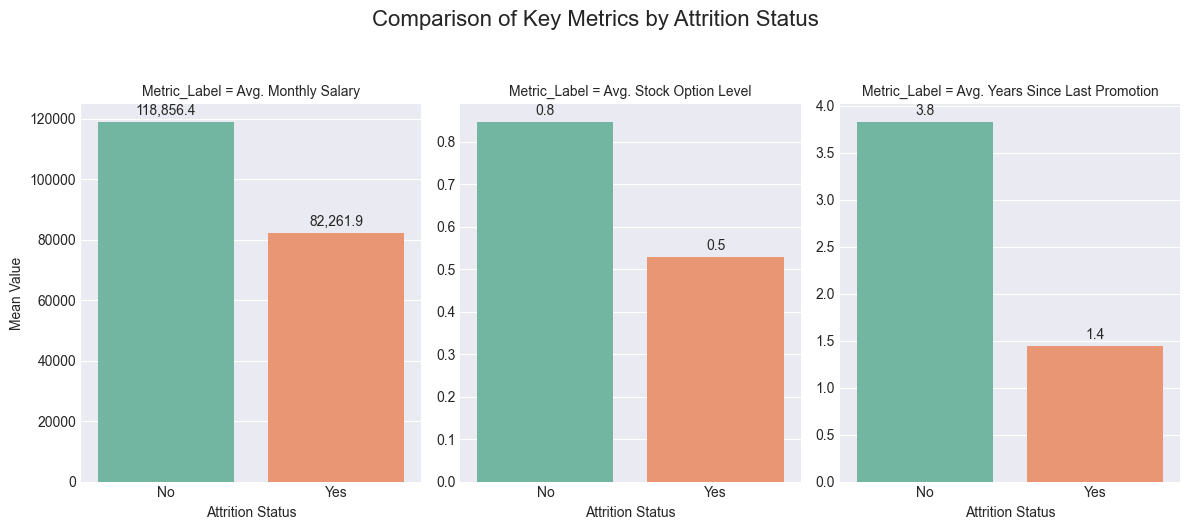

In [ ]:

# -----------------------------
attrition_summary_table = employee.groupby('Attrition').agg(
      AvgSalary=('Salary', 'mean'),
    AvgStockOption=('StockOptionLevel', 'mean'),
    AvgYearsSinceLastPromotion=('YearsSinceLastPromotion', 'mean')
).reset_index()

print("--- Attrition Summary Table ---")
print(attrition_summary_table.round(1))

# -----------------------------
# Step 3: Prepare data for plotting
# -----------------------------
plot_data = attrition_summary_table.melt(
    id_vars='Attrition',
    var_name='Metric',
    value_name='Mean Value'
)

# Rename metrics for better labels
metric_names = {
    'AvgSalary': 'Avg. Monthly Salary',
    'AvgStockOption': 'Avg. Stock Option Level',
    'AvgYearsSinceLastPromotion': 'Avg. Years Since Last Promotion'
}
plot_data['Metric_Label'] = plot_data['Metric'].map(metric_names)

# -----------------------------
# Step 4: Create Bar Charts (Facet)
# -----------------------------
g = sns.catplot(
    data=plot_data,
    x='Attrition',
    y='Mean Value',
    col='Metric_Label',
    kind='bar',
    palette='Set2',
    sharey=False,
    height=5,
    aspect=0.8
)

g.fig.suptitle('Comparison of Key Metrics by Attrition Status', y=1.05, fontsize=16)

# Add data labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    ax.set_xlabel('Attrition Status')
    ax.set_ylabel('Mean Value' if ax == g.axes.flat[0] else '')

plt.tight_layout()
plt.show()


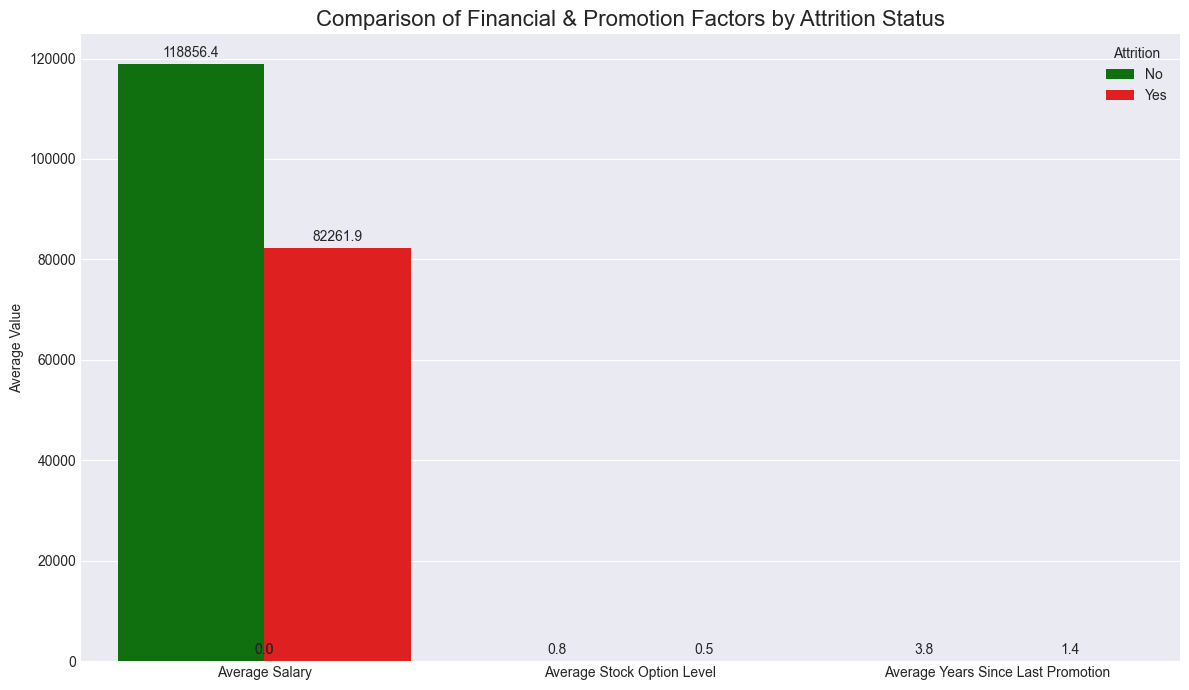

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------
# I. Load the Aggregated Attrition Summary Table
# -----------------------------------------------

df = pd.read_csv('attrition_salary_stock_promotion_summary.csv')

# -----------------------------------------------
# II. Prepare Data for Grouped Bar Chart
# -----------------------------------------------

# Correct metric column names based on your CSV
metrics = ['AvgSalary', 'AvgStockOptionLevel', 'AvgYearsSinceLastPromotion']

# Convert to long format for easier plotting
df_long = df.melt(
    id_vars='Attrition',
    value_vars=metrics,
    var_name='Metric',
    value_name='AverageValue'
)

# Cleaner labels for the chart
metric_labels = {
    'AvgSalary': 'Average Salary',
    'AvgStockOptionLevel': 'Average Stock Option Level',
    'AvgYearsSinceLastPromotion': 'Average Years Since Last Promotion'
}

df_long['Metric'] = df_long['Metric'].map(metric_labels)

# -----------------------------------------------
# III. Plot the Grouped Bar Chart
# -----------------------------------------------

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=df_long,
    x='Metric',
    y='AverageValue',
    hue='Attrition',
    palette={'Yes': 'red', 'No': 'green'}
)

plt.title('Comparison of Financial & Promotion Factors by Attrition Status', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Value')

# Display value labels above bars
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f'{value:.1f}',
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()


All tables loaded successfully (Employee, PerformanceRating, and 3 lookup tables).
✅ Date columns (HireDate, ReviewDate) converted to datetime type.
Date Dimension created successfully. Range: 2012-01-03 to 2022-12-31

--- Analysis of Composite Metrics ---
1. Overall Training Utilization Rate: 50.54% (useful for Job & Work Environment dashboard)

2. Average Rating Gap by Department:
Department
Human Resources   0.55
Sales             0.52
Technology        0.50


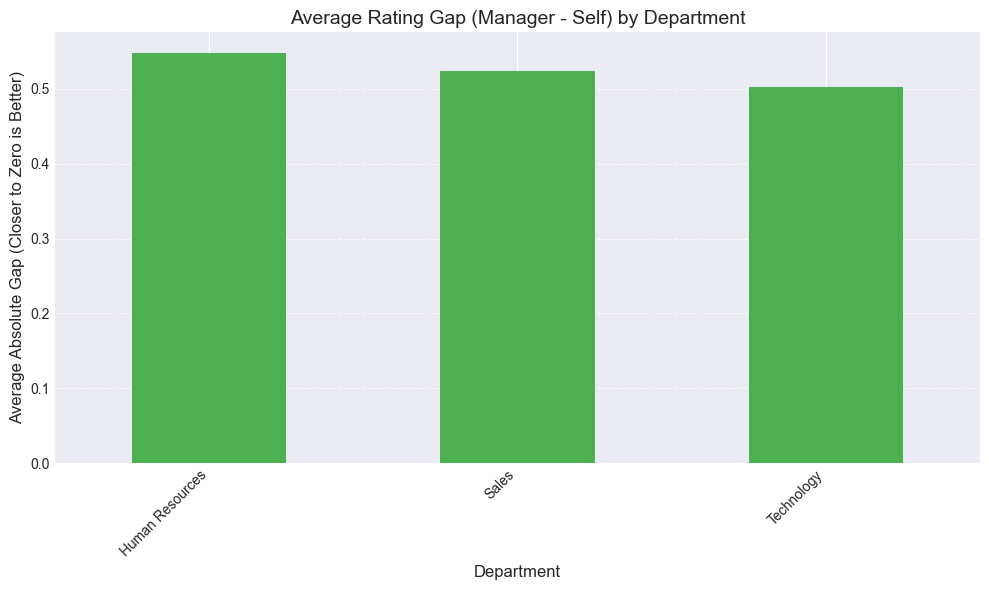


3. HireDate column type after preparation: datetime64[ns]

4. Total Estimated Attrition Cost (30% of salary): $5,848,821.00
This metric is key for the Attrition & Retention dashboard to convert risk into financial impact.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For data visualization

# File paths (assuming CSV files are in the current working directory)
EMPLOYEE_FILE = 'Employee.csv'
PERFORMANCE_FILE = 'PerformanceRating.csv'
# Lookup tables for Power BI model
EDUCATION_LEVEL_FILE = 'EducationLevel.csv'
RATING_LEVEL_FILE = 'RatingLevel.csv'
SATISFIED_LEVEL_FILE = 'SatisfiedLevel.csv'

# ----------------------------------------------------------------------
# 1. Load all data
# ----------------------------------------------------------------------
try:
    df_employee = pd.read_csv(EMPLOYEE_FILE)
    df_performance = pd.read_csv(PERFORMANCE_FILE)
    
    # Load lookup tables
    df_education = pd.read_csv(EDUCATION_LEVEL_FILE)
    df_rating = pd.read_csv(RATING_LEVEL_FILE)
    df_satisfied = pd.read_csv(SATISFIED_LEVEL_FILE)
    
    print("All tables loaded successfully (Employee, PerformanceRating, and 3 lookup tables).")
except FileNotFoundError:
    print("Error: CSV files not found. Please check the file paths.")
    exit()

# ----------------------------------------------------------------------
# 2. Data preparation (similar to Power Query transformations)
# ----------------------------------------------------------------------

# 2.1 Convert date columns (HireDate, ReviewDate) to proper datetime type
df_employee['HireDate'] = pd.to_datetime(df_employee['HireDate'], format='%d/%m/%Y', errors='coerce')
df_performance['ReviewDate'] = pd.to_datetime(df_performance['ReviewDate'], format='%d/%m/%Y', errors='coerce')
print("✅ Date columns (HireDate, ReviewDate) converted to datetime type.")

# 2.2 Create a Date Dimension table
def create_date_dimension(df_employee, df_performance):
    """
    Creates a Date Dimension table covering the date range of both datasets.
    """
    min_date = min(df_employee['HireDate'].min(), df_performance['ReviewDate'].min())
    max_date = max(df_employee['HireDate'].max(), df_performance['ReviewDate'].max())

    if pd.isna(min_date) or pd.isna(max_date):
        print("No valid dates found to create Date Dimension.")
        return pd.DataFrame()

    df_date = pd.DataFrame({'DateKey': pd.date_range(start=min_date, end=max_date, freq='D')})
    
    # Add useful columns for Power BI
    df_date['Year'] = df_date['DateKey'].dt.year
    df_date['Month'] = df_date['DateKey'].dt.month
    df_date['Day'] = df_date['DateKey'].dt.day
    df_date['MonthName'] = df_date['DateKey'].dt.strftime('%B')
    df_date['DayName'] = df_date['DateKey'].dt.strftime('%A')
    df_date['Quarter'] = df_date['DateKey'].dt.quarter.apply(lambda x: f'Q{x}')
    df_date['YearMonth'] = df_date['DateKey'].dt.strftime('%Y-%m')  # easy sorting in visuals

    return df_date

df_date = create_date_dimension(df_employee, df_performance)

if not df_date.empty:
    print(f"Date Dimension created successfully. Range: {df_date['DateKey'].min().strftime('%Y-%m-%d')} to {df_date['DateKey'].max().strftime('%Y-%m-%d')}")
    # Note: In Power BI, this table should be linked to HireDate and ReviewDate

# ----------------------------------------------------------------------
# 3. Create composite metrics (similar to DAX measures in Power BI)
# ----------------------------------------------------------------------

# Merge performance and employee tables to create composite metrics
df_merged = pd.merge(
    df_performance,
    df_employee[['EmployeeID', 'Department']],  # Department needed for analysis
    on='EmployeeID',
    how='left'
)

# A. Training Utilization Rate = Training Taken / Training Available
df_merged['TrainingUtilizationRate'] = (
    df_merged['TrainingOpportunitiesTaken'] / df_merged['TrainingOpportunitiesWithinYear']
)

# Handle division by zero or missing values
df_merged['TrainingUtilizationRate'] = df_merged['TrainingUtilizationRate'].replace([np.inf, -np.inf, np.nan], 0)

# B. Rating Gap = absolute difference between Manager Rating and Self Rating
df_merged['RatingGap'] = abs(df_merged['ManagerRating'] - df_merged['SelfRating'])

# ----------------------------------------------------------------------
# 4. Visualize and analyze new metrics
# ----------------------------------------------------------------------

print("\n--- Analysis of Composite Metrics ---")

# 4.1 Overall training utilization
total_utilization = df_merged['TrainingOpportunitiesTaken'].sum() / df_merged['TrainingOpportunitiesWithinYear'].sum()
print(f"1. Overall Training Utilization Rate: {total_utilization:.2%} (useful for Job & Work Environment dashboard)")

# 4.2 Average rating gap by department
avg_rating_gap_by_dept = df_merged.groupby('Department')['RatingGap'].mean().sort_values(ascending=False)
print("\n2. Average Rating Gap by Department:")
print(avg_rating_gap_by_dept.to_string())

# Bar chart visualization
plt.figure(figsize=(10, 6))
avg_rating_gap_by_dept.plot(kind='bar', color='#4CAF50')  # HR-friendly green
plt.title('Average Rating Gap (Manager - Self) by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Absolute Gap (Closer to Zero is Better)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4.3 Verify date column type
print(f"\n3. HireDate column type after preparation: {df_employee['HireDate'].dtype}")

# ----------------------------------------------------------------------
# 5. Proposed Attrition Cost Metric
# ----------------------------------------------------------------------

# Assumption: Replacement cost = 30% of annual salary
REPLACEMENT_COST_FACTOR = 0.30

# Filter employees who resigned
attrited_employees = df_employee[df_employee['Attrition'] == 'Yes'].copy()

# Calculate cost per attrited employee
attrited_employees['CostOfAttrition'] = attrited_employees['Salary'] * REPLACEMENT_COST_FACTOR

# Total estimated cost of attrition
total_attrition_cost = attrited_employees['CostOfAttrition'].sum()

print(f"\n4. Total Estimated Attrition Cost (30% of salary): ${total_attrition_cost:,.2f}")
print("This metric is key for the Attrition & Retention dashboard to convert risk into financial impact.")


In [ ]:

# Convert dates
employee['HireDate'] = pd.to_datetime(employee['HireDate'], dayfirst=True)
performance['ReviewDate'] = pd.to_datetime(performance['ReviewDate'])

# Merge employee + performance
perf_full = performance.merge(employee, on='EmployeeID', how='left')

# Extract review month
perf_full['Month'] = perf_full['ReviewDate'].dt.to_period('M')

# -----------------------------------------------------------
# Use ManagerRating as the main rating column
# -----------------------------------------------------------
perf_full['Rating'] = perf_full['ManagerRating']

# Sort
perf_full = perf_full.sort_values(by=['EmployeeID', 'ReviewDate'])

# -----------------------------------------------------------
# 1. First & Last rating per employee
# -----------------------------------------------------------
first_last = perf_full.groupby('EmployeeID').agg(
    first_rating=('Rating', 'first'),
    last_rating=('Rating', 'last'),
    first_date=('ReviewDate', 'first'),
    last_date=('ReviewDate', 'last'),
    reviews_count=('Rating', 'count')
).reset_index()

# -----------------------------------------------------------
# 2. RatingChange
# -----------------------------------------------------------
first_last['RatingChange'] = first_last['last_rating'] - first_last['first_rating']

# -----------------------------------------------------------
# 3. AnnualChangeRate
# -----------------------------------------------------------
first_last['years_diff'] = (
    (first_last['last_date'] - first_last['first_date']).dt.days / 365
).replace(0, np.nan)

first_last['AnnualChangeRate'] = first_last['RatingChange'] / first_last['years_diff']
first_last['AnnualChangeRate'] = first_last['AnnualChangeRate'].replace([np.inf, -np.inf], np.nan)

# Trend classification
def get_trend(rate):
    if pd.isna(rate):
        return 'Not Enough Data'
    if rate > 0.5:
        return 'Improving'
    elif rate < -0.5:
        return 'Declining'
    else:
        return 'Stable'

first_last['Trend'] = first_last['AnnualChangeRate'].apply(get_trend)

# -----------------------------------------------------------
# 4. Average days between reviews
# -----------------------------------------------------------
perf_full['next_review'] = perf_full.groupby('EmployeeID')['ReviewDate'].shift(-1)
perf_full['days_between_reviews'] = (perf_full['next_review'] - perf_full['ReviewDate']).dt.days

avg_gap = perf_full.groupby('EmployeeID')['days_between_reviews'].mean().reset_index()
avg_gap.rename(columns={'days_between_reviews': 'avg_days_between_reviews'}, inplace=True)

# -----------------------------------------------------------
# 5. Final merged table
# -----------------------------------------------------------
performance_metrics = first_last.merge(avg_gap, on='EmployeeID', how='left')

# Show
performance_metrics.head()


,EmployeeID,first_rating,last_rating,first_date,last_date,reviews_count,RatingChange,years_diff,AnnualChangeRate,Trend,avg_days_between_reviews
0,005C-E0FB,3,4,2020-06-17,2022-06-17,3,1,2.00,0.50,Stable,365.00
1,00A3-2445,3,4,2015-06-20,2022-06-18,8,1,7.00,0.14,Stable,365.00
2,00B0-F199,2,4,2014-05-22,2022-05-20,9,2,8.00,0.25,Stable,365.00
3,00D4-DD53,2,4,2013-03-01,2022-02-27,10,2,9.00,0.22,Stable,365.00
4,00E4-3D60,4,4,2014-03-30,2022-03-28,9,0,8.00,0.00,Stable,365.00


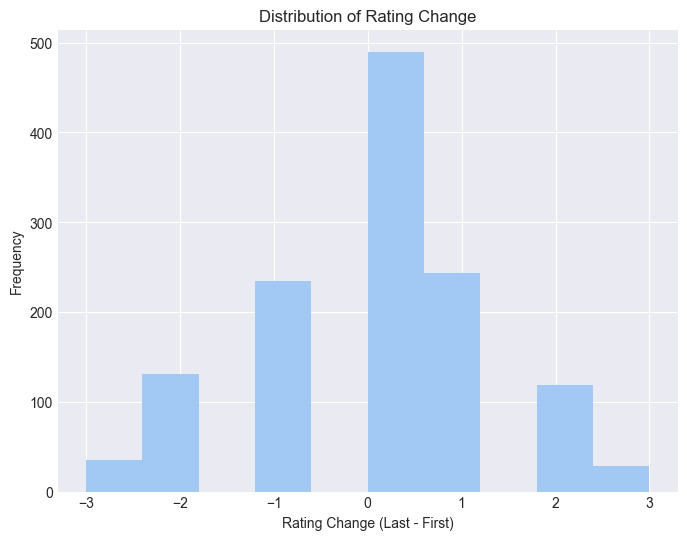

In [25]:
plt.figure(figsize=(8,6))
plt.hist(performance_metrics['RatingChange'].dropna(), bins=10)
plt.xlabel("Rating Change (Last - First)")
plt.ylabel("Frequency")
plt.title("Distribution of Rating Change")
plt.show()


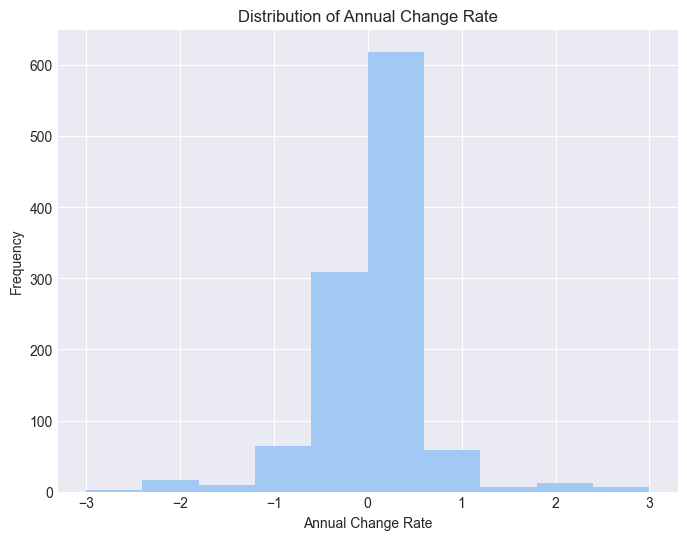

In [26]:
plt.figure(figsize=(8,6))
plt.hist(performance_metrics['AnnualChangeRate'].dropna(), bins=10)
plt.xlabel("Annual Change Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Change Rate")
plt.show()


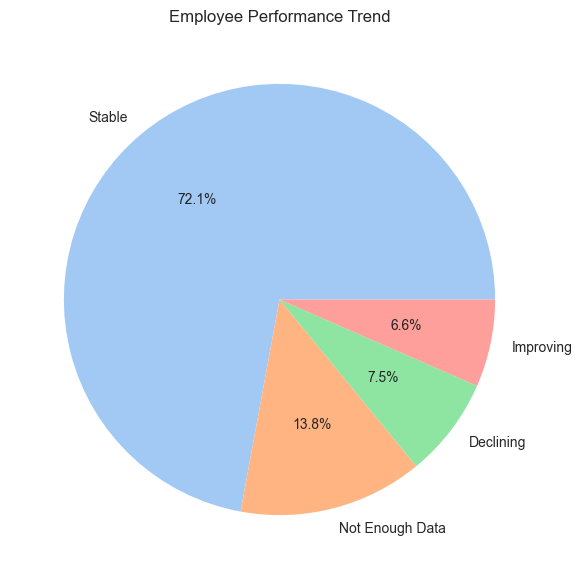

In [27]:
trend_counts = performance_metrics['Trend'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%')
plt.title("Employee Performance Trend")
plt.show()


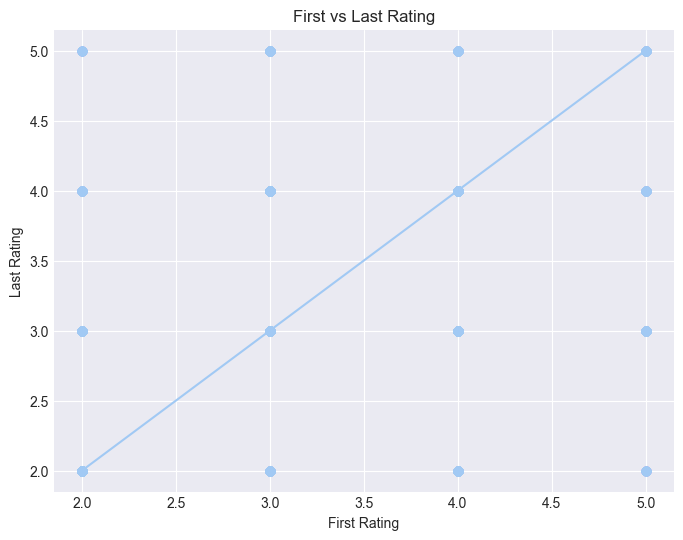

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(performance_metrics['first_rating'], performance_metrics['last_rating'])
plt.xlabel("First Rating")
plt.ylabel("Last Rating")
plt.title("First vs Last Rating")
min_val = min(performance_metrics['first_rating'].min(),
              performance_metrics['last_rating'].min())
max_val = max(performance_metrics['first_rating'].max(),
              performance_metrics['last_rating'].max())

plt.plot([min_val, max_val], [min_val, max_val])
plt.show()


C:\Users\sayds\AppData\Local\Temp\ipykernel_9740\354681895.py:11: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)


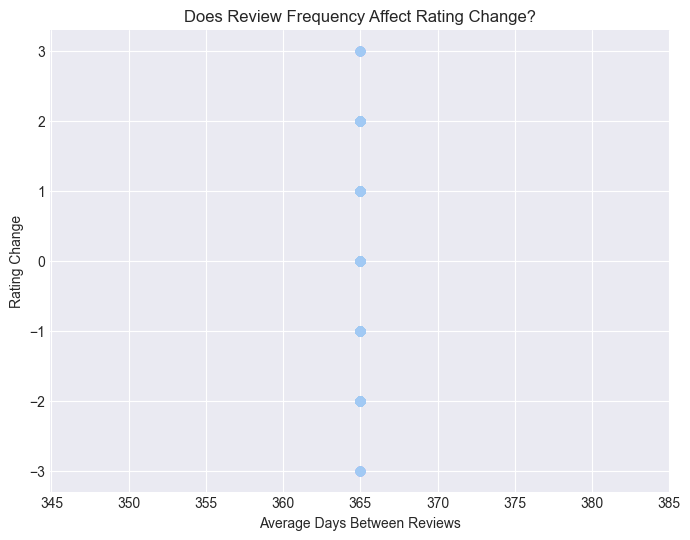

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(performance_metrics['avg_days_between_reviews'], performance_metrics['RatingChange'])
plt.xlabel("Average Days Between Reviews")
plt.ylabel("Rating Change")
plt.title("Does Review Frequency Affect Rating Change?")

# Regression line
x = performance_metrics['avg_days_between_reviews'].dropna()
y = performance_metrics.loc[x.index, 'RatingChange']

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================================
# Prepare aggregated data for visualization
# ===============================================

# Mean self/manager rating per employee
rating_mean = perf_full.groupby("EmployeeID").agg({
    "SelfRating": "mean",
    "ManagerRating": "mean",
    "TrainingOpportunitiesTaken": "sum"
}).reset_index()

rating_mean.rename(columns={
    "SelfRating": "SelfMean",
    "ManagerRating": "ManagerMean",
    "TrainingOpportunitiesTaken": "training_taken"
}, inplace=True)

# Gap between self and manager
rating_mean["Self_vs_Manager_Diff"] = rating_mean["SelfMean"] - rating_mean["ManagerMean"]

# Compute change in rating (last - first manager rating)
rating_change = perf_full.sort_values(["EmployeeID", "ReviewDate"]).groupby("EmployeeID").agg({
    "ManagerRating": ["first", "last"]
})

rating_change.columns = ["FirstRating", "LastRating"]
rating_change.reset_index(inplace=True)

# Merge into final DF
final_analysis = rating_mean.merge(rating_change, on="EmployeeID", how="left")
final_analysis["RatingChange"] = final_analysis["LastRating"] - final_analysis["FirstRating"]

# Categorize rating trend
final_analysis["BiasType"] = final_analysis["RatingChange"].apply(
    lambda x: "Improving" if x > 0 else ("Declining" if x < 0 else "Stable")
)


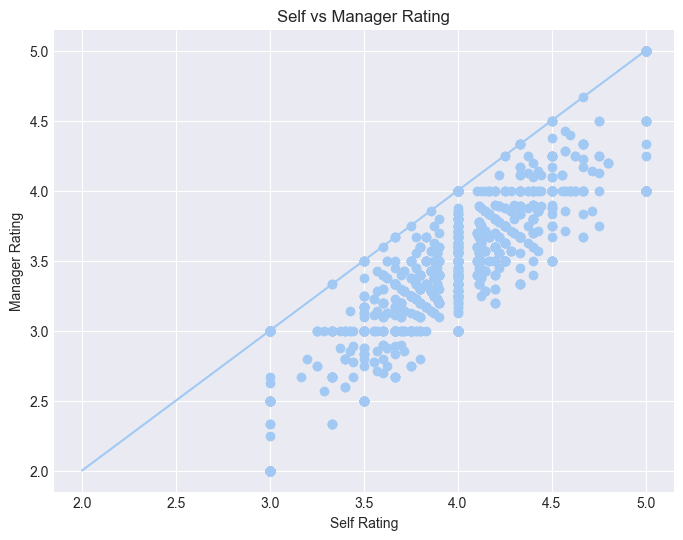

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(final_analysis['SelfMean'], final_analysis['ManagerMean'])
plt.xlabel("Self Rating")
plt.ylabel("Manager Rating")
plt.title("Self vs Manager Rating")

# Ideal agreement diagonal line
min_val = min(final_analysis['SelfMean'].min(), final_analysis['ManagerMean'].min())
max_val = max(final_analysis['SelfMean'].max(), final_analysis['ManagerMean'].max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()


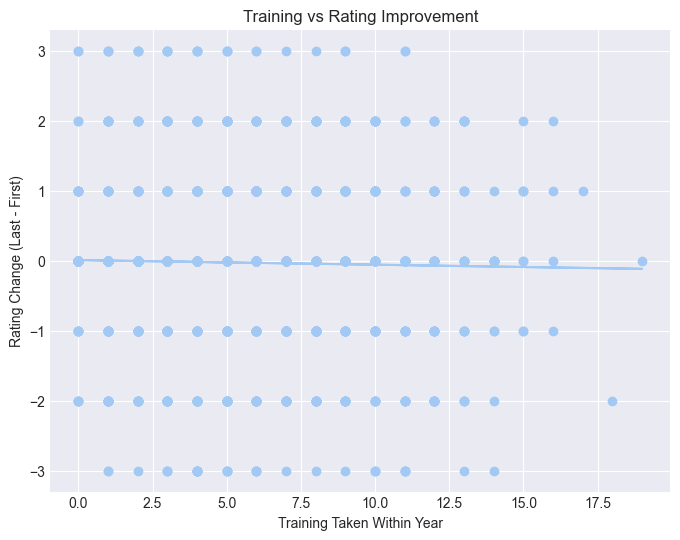

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(final_analysis['training_taken'], final_analysis['RatingChange'])
plt.xlabel("Training Taken Within Year")
plt.ylabel("Rating Change (Last - First)")
plt.title("Training vs Rating Improvement")

# Regression Line
x = final_analysis['training_taken']
y = final_analysis['RatingChange']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.show()


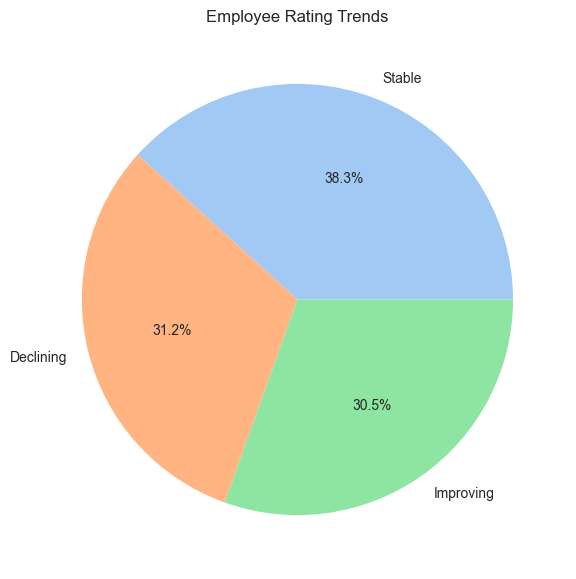

In [24]:
trend_counts = final_analysis['BiasType'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%')
plt.title("Employee Rating Trends")
plt.show()



--- 6. Rating Trends per Department (Analysis) ---


C:\Users\sayds\AppData\Local\Temp\ipykernel_22408\2405299726.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


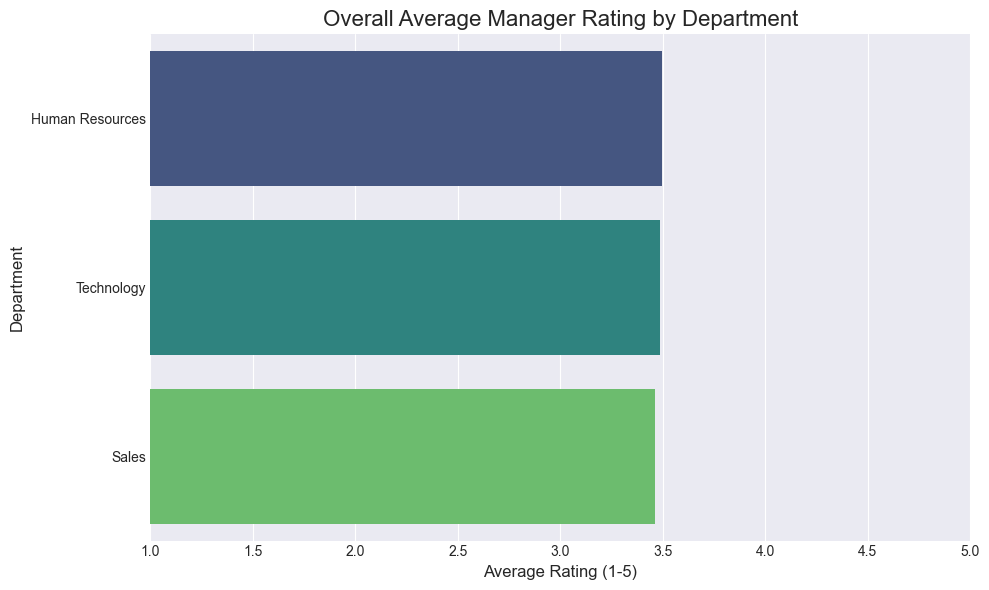

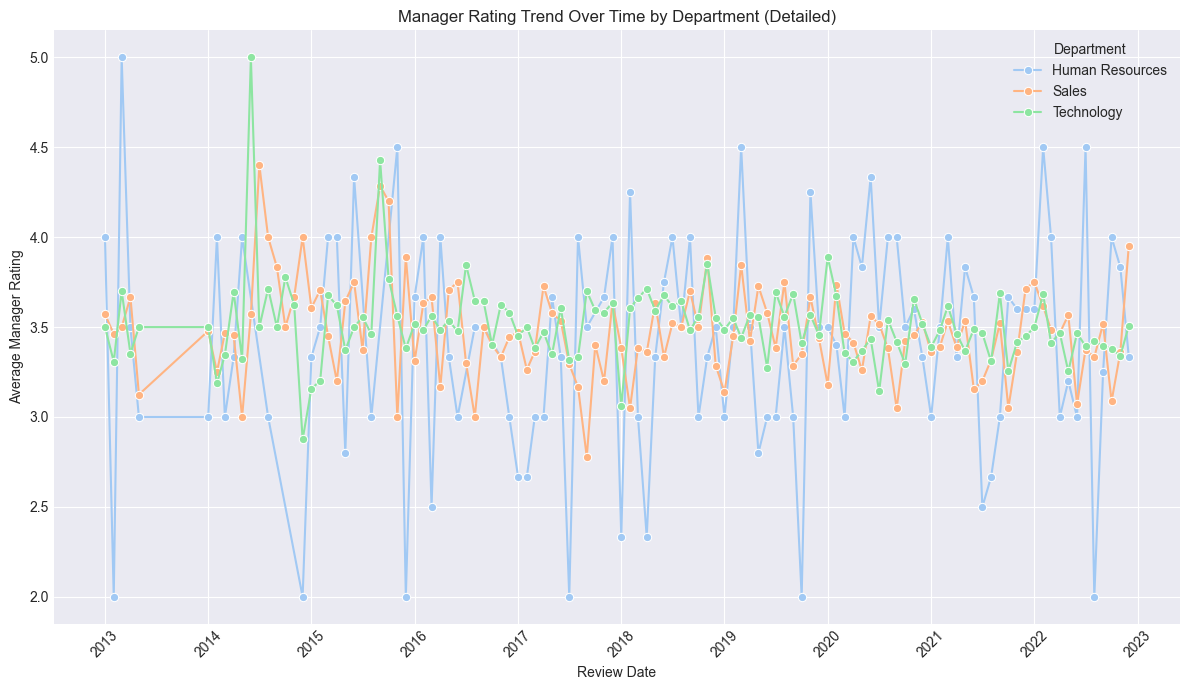

In [28]:
# -------------------------------------------------------
# --- 6. Rating Trends per Department (اتجاهات التقييم حسب القسم) ---
# -------------------------------------------------------
print("\n--- 6. Rating Trends per Department (Analysis) ---")

# FIX: Calculate Overall Average Rating by Department (Clearer Comparison)
overall_dept_avg = perf_full.drop_duplicates(subset=['EmployeeID', 'ManagerRating', 'Department']).groupby('Department')['ManagerRating'].mean().reset_index()

plt.figure(figsize=(10, 6))
# Bar plot for clearer comparison of overall departmental performance
sns.barplot(
    x='ManagerRating', 
    y='Department', 
    data=overall_dept_avg, 
    palette='viridis',
    order=overall_dept_avg.sort_values('ManagerRating', ascending=False)['Department'] # Sort by rating
)

plt.title('Overall Average Manager Rating by Department', fontsize=16)
plt.xlabel('Average Rating (1-5)', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xlim(1, 5) 
plt.tight_layout()
plt.show()


# Plotting the Time Trend (Corrected)
# FIX: Use 'ReviewMonth' instead of 'Month'
dept_rating_trend = perf_full.groupby(['Department', 'Month'])['ManagerRating'].mean().reset_index()
dept_rating_trend['ReviewMonth_Start'] = dept_rating_trend['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 7))
sns.lineplot(data=dept_rating_trend, x='ReviewMonth_Start', y='ManagerRating', hue='Department', marker='o', errorbar=None)
plt.title('Manager Rating Trend Over Time by Department (Detailed)')
plt.xlabel('Review Date')
plt.ylabel('Average Manager Rating')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- 1. Employee Turnover Analysis ---
Employee Turnover Rate: 18.52%

--- 2. Average Tenure ---
Average Tenure (Years): 5.19 years

--- 3. Performance Distribution ---


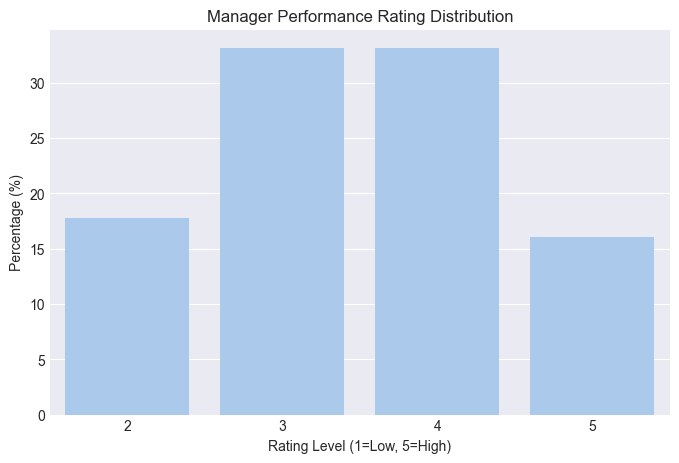


--- 4. Promotion Rate (Proxy Calculation) ---
Average Years Since Last Promotion: 3.91 years
Percentage of employees promoted in the last 3 years: 49.84%

--- 5. Absenteeism Analysis ---
NOTE: Absenteeism cannot be analyzed as the dataset does not contain days/hours absent data.

--- 7. High Performer Retention ---
High Performer Retention Rate: 81.15%


In [32]:
# Assuming 'perf_full' DataFrame is ready from the previous step

# -------------------------------------------------------
# --- 1. Employee Turnover (Turnover Rate) ---
# -------------------------------------------------------
print("--- 1. Employee Turnover Analysis ---")
total_employees = perf_full['EmployeeID'].nunique()
attrition_count = perf_full[perf_full['Attrition'] == 'Yes']['EmployeeID'].nunique()
turnover_rate = (attrition_count / total_employees) * 100

print(f"Employee Turnover Rate: {turnover_rate:.2f}%")

# -------------------------------------------------------
# --- 2. Average Tenure (Average time spent in the company) ---
# -------------------------------------------------------
print("\n--- 2. Average Tenure ---")
# Drop duplicates to ensure each employee contributes once
avg_tenure = perf_full.drop_duplicates(subset=['EmployeeID'])['YearsAtCompany'].mean()
print(f"Average Tenure (Years): {avg_tenure:.2f} years")

# -------------------------------------------------------
# --- 3. Performance Distribution (Plotting) ---
# -------------------------------------------------------
print("\n--- 3. Performance Distribution ---")
performance_counts = perf_full['ManagerRating'].value_counts(normalize=True).sort_index() * 100
performance_df = performance_counts.reset_index()
performance_df.columns = ['Rating', 'Percentage']

# Plotting Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x='Rating', y='Percentage', data=performance_df, order=sorted(performance_df['Rating'].unique()))
plt.title('Manager Performance Rating Distribution')
plt.xlabel('Rating Level (1=Low, 5=High)')
plt.ylabel('Percentage (%)')
plt.show()

# -------------------------------------------------------
# --- 4. Promotion Rate (Proxy Calculation using Years Since Last Promotion) ---
# -------------------------------------------------------
print("\n--- 4. Promotion Rate (Proxy Calculation) ---")
employee_tenure_data = perf_full.drop_duplicates(subset=['EmployeeID'])
    
# Proxy Metric 1: Average years since last promotion
avg_years_since_promo = employee_tenure_data['YearsSinceLastPromotion'].mean()
print(f"Average Years Since Last Promotion: {avg_years_since_promo:.2f} years")

# Proxy Metric 2: Percentage of employees promoted in the last 3 years
recent_promo_count = employee_tenure_data[employee_tenure_data['YearsSinceLastPromotion'] <= 3].shape[0]
recent_promo_rate = (recent_promo_count / employee_tenure_data.shape[0]) * 100
print(f"Percentage of employees promoted in the last 3 years: {recent_promo_rate:.2f}%")

# -------------------------------------------------------
# --- 5. Absenteeism Analysis ---
# -------------------------------------------------------
print("\n--- 5. Absenteeism Analysis ---")
print("NOTE: Absenteeism cannot be analyzed as the dataset does not contain days/hours absent data.")

# -------------------------------------------------------
# --- 7. High Performer Retention ---
# -------------------------------------------------------
print("\n--- 7. High Performer Retention ---")
HIGH_PERFORMER_RATING_THRESHOLD = 4

# Get the latest rating for each employee
latest_performance = perf_full.sort_values('ReviewDate', ascending=False).drop_duplicates(subset=['EmployeeID'])
high_performers = latest_performance[latest_performance['ManagerRating'] >= HIGH_PERFORMER_RATING_THRESHOLD]

total_high_performers = high_performers['EmployeeID'].nunique()
high_performer_attrition = high_performers[high_performers['Attrition'] == 'Yes']['EmployeeID'].nunique()

if total_high_performers > 0:
    high_performer_turnover_rate = (high_performer_attrition / total_high_performers) * 100
    high_performer_retention_rate = 100 - high_performer_turnover_rate
else:
    high_performer_retention_rate = np.nan

print(f"High Performer Retention Rate: {high_performer_retention_rate:.2f}%")